<b>Definitive Pandas Toolkit</b>

[Documentação-Oficial](https://pandas.pydata.org/)

Este notebook tem por objetivo realizar demonstrações práticas a respeito da biblioteca Pandas, evidenciando toda sua funcionalidade e abordando situações corriqueiras na análise e preparação de dados coletas através de Datasets.
    Com as facilidades apresentadas pelo Pandas, é possível:
* Tratar e analisar dados de difersas fontes e extensões (.csv, .json;
* Realizar Data Cleaning, Data Munging e Data Wrangling facilmente;
* Visualizar alterações em Datasets em tempo real;
* Analisar informações em formato de tabela (muito semelhante ao Excel);

Em conjunto com as demais ferramentas do <i>PyData Stack</i>, tais como Numpy e Matplotlib, o Pandas oferece a possibilidade de reunir, analisar e limpar dados de maneira eficiente e expressiva. 

# First Steps

## Importando a biblioteca

Há basicamente duas formas diferentes de se importar uma biblioteca. A primeira delas, adotando convenções utilizadas dentro do universo do PyData Stack, utiliza "apelidos". A segunda, visando uma otimização do código, trabalha apenas com módulos específicos utilizados no código. 

In [8]:
# Importando a biblioteca pandas com "apelido" pd
import pandas as pd

In [6]:
# Importando apenas módulos específicos da biblioteca
from pandas import DataFrame, Series

In [6]:
# Verificando a versão instalada
pd.__version__

'0.22.0'

## Series

<i>class </i>pandas.<b>Series</b>(<i>data=None, index=None, name=None, copy=False, fastpath=False</i>)

[Documentacao-Oficial](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)

O objeto do tipo Series nada mais é do que um _array_ unidimensional que contém um _array_ de <b>dados</b> e um _array_ de labels, conhecido como <b>índice</b>.

### Series sem índice 

In [9]:
# Criando uma série sem especificar os índices
series_1 = Series([10, 20, 30, 40, 50])

# Imprimindo objeto criado
print(series_1)

0    10
1    20
2    30
3    40
4    50
dtype: int64


In [10]:
# Verificando o tipo do objeto criado
type(series_1)

pandas.core.series.Series

In [11]:
# Atributo para retornar valores do objeto Series
series_1.values

array([10, 20, 30, 40, 50], dtype=int64)

In [12]:
# Atributo para retornar índices do objeto Series
series_1.index

RangeIndex(start=0, stop=5, step=1)

In [14]:
# Acessando elementos
series_1[3]

40

### Series com índice

In [13]:
# Diferente do exemplo anterior, deve-se agora especificar um índice em formato de lista
series_2 = Series([12, 5, 30, -10, 25], index=['a', 'b', 'c', 'd', 'e'])
print(series_2)

a    12
b     5
c    30
d   -10
e    25
dtype: int64


In [27]:
# Atributo para retornar valores do objeto Series
series_2.values

array([ 12,   5,  30, -10,  25], dtype=int64)

In [28]:
# Atributo para retornar índices do objeto Series
series_2.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [30]:
# Slice
series_2[series_2 > 10]

a    12
c    30
e    25
dtype: int64

In [31]:
# Busca
series_2['b']

5

In [32]:
# Operações lógicas
'b' in series_2

True

In [16]:
# Acessando elementos
series_2[:3]

a    12
b     5
c    30
dtype: int64

### Series com dicionários

In [39]:
# Criando Series através de dicionários
dicio = {'Futebol':5200, 'Tenis':120, 'Natação': 698, 'Volleyball':1550}
series_3 = Series(dicio)
print(series_3)

Futebol       5200
Natação        698
Tenis          120
Volleyball    1550
dtype: int64


In [40]:
# Verificando tipo
type(series_3)

pandas.core.series.Series

In [41]:
# Modificando índice
novo_indice = ['Futebol', 'Tenis', 'Natação', 'Basketball']
series_3 = Series(dicio, index=novo_indice)
print(series_3)

Futebol       5200.0
Tenis          120.0
Natação        698.0
Basketball       NaN
dtype: float64


Um fato curioso aconteceu: o Pandas retorno NaN para dados referentes a Basketball. Isso se deu pois, ao fazer um cruzamento com o dicionário, não foi possível encontrar uma relação entre o índice em questão com algum valor associado (de fato, não há a chave Basketball no dicionário).

<i>NaN = dados missing.

### Dados NaN 

In [42]:
# Métodos e atributos para tal
pd.isnull(series_3)

Futebol       False
Tenis         False
Natação       False
Basketball     True
dtype: bool

In [43]:
pd.notnull(series_3)

Futebol        True
Tenis          True
Natação        True
Basketball    False
dtype: bool

In [45]:
series_3.isnull()

Futebol       False
Tenis         False
Natação       False
Basketball     True
dtype: bool

In [50]:
series_3.isnull().values

array([False, False, False,  True])

In [51]:
series_3.isnull().values.any()

True

## Dataframes

<i>class </i>pandas.<b>Dataframe</b>(<i>data=None, index=None, name=None, copy=False, fastpath=False</i>)

[Documentacao-Oficial](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

Os Dataframes representam uma estrutura tabular, semelhante a estrutura de uma planilha do Excel, contendo uma coleção de <i>colunas</i> em que cada uma pode conter um tipo diferente de valor (int, string, boolean, etc).

Dataframes possuem <i>index</i> e <i>linhas</i> e são armazenados em um ou mais blocos <b>bidimensionais</b>, ao invés de listas/dicionários.

### Criando DataFrames

Há diversas formas de se criar DataFrames, sendo a mais comum através da leitura de arquivos externos. Entretanto, conhecer as estruturas que compõe os DataFrames é de extrema importância para uma boa análise dos dados.

In [26]:
# É possível criar Dataframes a partir de dicionários
pink_floyd_disco = {'Album':['The Dark Side of the Moon', 'Wish You Were Here', 'The Wall', 'Animals', 'The Divison Bell', 'The Final Cut'],
                    'Ano': [1973, 1975, 1979, 1977, 1994, 1983]}
df = DataFrame(pink_floyd_disco)
df

Album   Ano
0  The Dark Side of the Moon  1973
1         Wish You Were Here  1975
2                   The Wall  1979
3                    Animals  1977
4           The Divison Bell  1994
5              The Final Cut  1983

In [38]:
# Também é possível obter DataFrames a partir de dados externos de arquivos
bike_sharing = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/bike_sharing_dataset/day.csv')
bike_sharing.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

Vimos que, diferente dos objetos do tipo <b>Series</b>, os <b>DataFrames</b> são compostos de dados tabulares bi-dimensionais (um exemplo são os dicionários cujos valores são listas), transformando o resultado em uma verdadeira tabela para análise. Mais adiante veremos como explorar os dados obtidos através de Series e DataFrames.

In [27]:
# Verificando o tipo do objeto criado
type(df)

pandas.core.frame.DataFrame

# Exploratory Data Analysis

É conhecido como <b>EDA</b> <i>(Exploratory Data Analysis)</i> o processo de reunir, avaliar, analisar e extrair informações a respeito de um dado Dataset. Para tal, o Pandas oferece diversas funcionalidades úteis compostas por métodos e atributos responsáveis por manipular até os mais complexos Datasets.

## Student Scores

In [45]:
# Importando biblioteca e lendo arquivo
import pandas as pd

df_student = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/student-scores.csv')

In [46]:
# Verificando informações iniciais do Dataset
df_student.head()

ID   Name  Attendance    HW  Test1  Project1  Test2  Project2  Final
0  27604    Joe        0.96  0.97   87.0      98.0   92.0      93.0   95.0
1  30572   Alex        1.00  0.84   92.0      89.0   94.0      92.0   91.0
2  39203  Avery        0.84  0.74   68.0      70.0   84.0      90.0   82.0
3  28592   Kris        0.96  1.00   82.0      94.0   90.0      81.0   84.0
4  27492   Rick        0.32  0.85   98.0     100.0   73.0      82.0   88.0

<b>Parâmetros: </b><i>.read_csv()</i>

* sep - define o separador a ser utilizado
* header - define a linha a ser utilizada como cabeçalho
* names - utiliza uma nova lista como cabeçalho
* index_col - transforma a(s) coluna(s) passada(s) como índice(s)

Ver mais em: [read_csv-Documentacao](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [48]:
# Verificando tipos primitivos das colunas
df_student.dtypes

ID              int64
Name           object
Attendance    float64
HW            float64
Test1         float64
Project1      float64
Test2         float64
Project2      float64
Final         float64
dtype: object

<b>Detalhe:</b> dados do tipo <i>string</i> são armazenados no Pandas como sendo do tipo <i>object</i>. Para verificar mais a fundo, podemos indexar a coluna para retornar um dado único e verificar seu tipo

In [50]:
# Verificando tipo primitivo da coluna 'Name'
type(df_student['Name'][0])

str

<b>Observação:</b> é interessante pensar qual o tipo primitivo o comando retornaria caso o índice [0] não estivesse presente. Algum palpite de acordo com o que já vimos até aqui? 

In [51]:
# Qual o tipo primitivo de uma única coluna?
type(df_student['Name'])

pandas.core.series.Series

In [52]:
# Realizando análises mais detalhadas nos dados
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
ID            5 non-null int64
Name          5 non-null object
Attendance    5 non-null float64
HW            5 non-null float64
Test1         5 non-null float64
Project1      5 non-null float64
Test2         5 non-null float64
Project2      5 non-null float64
Final         5 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 440.0+ bytes


Percebemos que trata-se de um Dataset com uma quantidade ínfima de dados (5 linhas apenas). O método <i>.info()</i> é muito importante pois nele conseguimos identificar valores NaN em colunas (quantidade de valores na coluna será menor que a quantidade total).

In [55]:
# Retornando diretamente linhas e colunas
df_student.shape

(5, 9)

In [56]:
# Envolvendo estatística
df_student.describe()

ID  Attendance        HW     Test1    Project1      Test2  \
count      5.000000     5.00000  5.000000   5.00000    5.000000   5.000000   
mean   30692.600000     0.81600  0.880000  85.40000   90.200000  86.600000   
std     4915.212691     0.28369  0.105594  11.39298   12.049896   8.473488   
min    27492.000000     0.32000  0.740000  68.00000   70.000000  73.000000   
25%    27604.000000     0.84000  0.840000  82.00000   89.000000  84.000000   
50%    28592.000000     0.96000  0.850000  87.00000   94.000000  90.000000   
75%    30572.000000     0.96000  0.970000  92.00000   98.000000  92.000000   
max    39203.000000     1.00000  1.000000  98.00000  100.000000  94.000000   

        Project2      Final  
count   5.000000   5.000000  
mean   87.600000  88.000000  
std     5.683309   5.244044  
min    81.000000  82.000000  
25%    82.000000  84.000000  
50%    90.000000  88.000000  
75%    92.000000  91.000000  
max    93.000000  95.000000

O método <i>.describe()</i> é extremamente útil para visualizar alguns dados estatísticos de maneira direta. Percebe-se que o .describe() foi aplicado apenas às colunas cujo tipo primitivo pode ser tratado como numérico.

In [57]:
# Também é possível aplicar conceitos estatísticos diretamente nas colunas
df_student['Project1'].mean()

90.2

In [60]:
# Retornando as colunas do Dataset
df_student.columns

Index(['ID', 'Name', 'Attendance', 'HW', 'Test1', 'Project1', 'Test2',
       'Project2', 'Final'],
      dtype='object')

In [61]:
# Retornando valores do Dataset
df_student.values

array([[27604, 'Joe', 0.96, 0.97, 87.0, 98.0, 92.0, 93.0, 95.0],
       [30572, 'Alex', 1.0, 0.84, 92.0, 89.0, 94.0, 92.0, 91.0],
       [39203, 'Avery', 0.84, 0.74, 68.0, 70.0, 84.0, 90.0, 82.0],
       [28592, 'Kris', 0.96, 1.0, 82.0, 94.0, 90.0, 81.0, 84.0],
       [27492, 'Rick', 0.32, 0.85, 98.0, 100.0, 73.0, 82.0, 88.0]],
      dtype=object)

<b>Observação:</b> valores são retornados como um <i>ndarray</i> do <b>Numpy</b>, o qual será visto mais a frente.

In [66]:
# Modificando nomes das colunas
label = ['ID', 'Nome', 'Frequência', 'HW', 'P1', 'Lab1', 'P2', 'Lab2', 'Final']
df_student.columns = label
df_student

ID   Nome  Frequência    HW    P1   Lab1    P2  Lab2  Final
0  27604    Joe        0.96  0.97  87.0   98.0  92.0  93.0   95.0
1  30572   Alex        1.00  0.84  92.0   89.0  94.0  92.0   91.0
2  39203  Avery        0.84  0.74  68.0   70.0  84.0  90.0   82.0
3  28592   Kris        0.96  1.00  82.0   94.0  90.0  81.0   84.0
4  27492   Rick        0.32  0.85  98.0  100.0  73.0  82.0   88.0

In [67]:
# Analisando o Dataset, é possível perceber facilmente que o ID poderia ser o índice das linhas
df_student.set_index('ID')

Nome  Frequência    HW    P1   Lab1    P2  Lab2  Final
ID                                                            
27604    Joe        0.96  0.97  87.0   98.0  92.0  93.0   95.0
30572   Alex        1.00  0.84  92.0   89.0  94.0  92.0   91.0
39203  Avery        0.84  0.74  68.0   70.0  84.0  90.0   82.0
28592   Kris        0.96  1.00  82.0   94.0  90.0  81.0   84.0
27492   Rick        0.32  0.85  98.0  100.0  73.0  82.0   88.0

<b>Análise Final: </b> O Dataset <i>student_scores</i> é nitidamente uma ferramente para testes iniciais, provendo apenas 5 linhas para análises e poucas colunas/atributos. Entretanto, a partir de sua manipulação, foi possível treinar funções e métodos presentes em qualquer análise exploratório, como por exemplo:

* Leitura de arquivo .csv <b>.read_csv()</b>
* Visualização dos dados <b>.head()</b>
* Verificação dos tipos de dados <b>.dtypes</b>
* Informações mais detalhadas <b>.info()</b>
* Contagem de linhas e colunas <b>.shape</b>
* Informações estatísticas <b>.describe()</b>
* Média de uma coluna de dados <b>.mean()</b>
* Visualização de todas as colunas <b>.columns</b>
* Visualização de todos os valores <b>.values</b>
* Mudança de header <b>.columns = <i>label</i></b>
* Mudança de índice <b>.set_index(<i>'Column'</i>)</b>

## Powerplant

Dataset real com informações relevantes a respeito de uma Usina de Energia.

<b>Link:</b> http://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant

<b>Atributos:</b>

Features consist of hourly average ambient variables 
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW

In [5]:
# Importando bibliotecas e lendo arquivo
import pandas as pd

df_pp = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/powerplant.csv')
df_pp.head()

AT;V;AP;RH;PE
14 96;41 76;1024 07;73 17;463           26.0
25 18;62 96;1020 04;59 08;444           37.0
5  11;39 4;1012  16;92 14;488           56.0
20 86;57 32;1010 24;76 64;446           48.0
10 82;37 5;1009  23;96 62;473            9.0

<b>Observação:</b> Percebe-se que o documento está separado por <b>;</b> e não por <b>,</b> e, portanto, é necessária a chamado de um parâmetro adicional - <i>sep</i>

In [6]:
# Configurando separador
df_pp = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/powerplant.csv', sep=';')
df_pp.head()

AT      V       AP     RH      PE
0  14,96  41,76  1024,07  73,17  463,26
1  25,18  62,96  1020,04  59,08  444,37
2   5,11   39,4  1012,16  92,14  488,56
3  20,86  57,32  1010,24  76,64  446,48
4  10,82   37,5  1009,23  96,62   473,9

In [8]:
# Para facilitar o entendimento dos dados, é possível alterar o nome das colunas
new_columns = ['Temperature', 'Exhaust Vacuum', 'Pressure', 'RH', 'Energy Output']
df_pp.columns = new_columns
df_pp.head()

Temperature Exhaust Vacuum Pressure     RH Energy Output
0       14,96          41,76  1024,07  73,17        463,26
1       25,18          62,96  1020,04  59,08        444,37
2        5,11           39,4  1012,16  92,14        488,56
3       20,86          57,32  1010,24  76,64        446,48
4       10,82           37,5  1009,23  96,62         473,9

In [9]:
# Verificando linhas e colunas
df_pp.shape

(9568, 5)

In [10]:
# Informações adicionais
df_pp.dtypes

Temperature       object
Exhaust Vacuum    object
Pressure          object
RH                object
Energy Output     object
dtype: object

<b>Observação:</b> Aparentemente todos os dados estão armazenados como <i>string</i>.

In [11]:
# Verificando mais a fundo
type(df_pp['RH'][0])

str

In [12]:
# Envolvendo estatística
df_pp.describe()

Temperature Exhaust Vacuum Pressure      RH Energy Output
count         9568           9568     9568    9568          9568
unique        2773            634     2517    4546          4836
top          25,21          70,32  1013,88  100,09         468,8
freq            14             61       16      26             9

In [14]:
# Verificando valores NaN
df_pp.isnull().any()

Temperature       False
Exhaust Vacuum    False
Pressure          False
RH                False
Energy Output     False
dtype: bool

In [15]:
# Uma outra forma de contabilizar seria com a função .sum()
df_pp.isnull().sum()

Temperature       0
Exhaust Vacuum    0
Pressure          0
RH                0
Energy Output     0
dtype: int64

In [16]:
# Salvando alterações no cabeçalho em novo arquivo .csv
df_pp.to_csv('C:/Users/thiagoPanini/Downloads/datasets/powerplant_edited.csv')

In [18]:
df_pp_edited = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/powerplant_edited.csv')
df_pp_edited.head()

Unnamed: 0 Temperature Exhaust Vacuum Pressure     RH Energy Output
0           0       14,96          41,76  1024,07  73,17        463,26
1           1       25,18          62,96  1020,04  59,08        444,37
2           2        5,11           39,4  1012,16  92,14        488,56
3           3       20,86          57,32  1010,24  76,64        446,48
4           4       10,82           37,5  1009,23  96,62         473,9

<b>Observação:</b> Inesperadamente surgiu uma coluna chamada <b>Unnamed: 0</b> no Dataset. Isto pode ser resolvido passando alguns parâmetros na hora de salvar o novo Dataset em formato .csv

In [19]:
df_pp.to_csv('C:/Users/thiagoPanini/Downloads/datasets/powerplant_edited.csv', index=False)

In [20]:
df_pp_edited = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/powerplant_edited.csv')
df_pp_edited.head()

Temperature Exhaust Vacuum Pressure     RH Energy Output
0       14,96          41,76  1024,07  73,17        463,26
1       25,18          62,96  1020,04  59,08        444,37
2        5,11           39,4  1012,16  92,14        488,56
3       20,86          57,32  1010,24  76,64        446,48
4       10,82           37,5  1009,23  96,62         473,9

<b>Análise Final: </b> Os dados contidos em <i>powerplant</i> são extremamente úteis pois são reais. De fato, a quantidade de linhas e colunas se assemelha muito ao que se encontra por aí afora. Entretanto, como não havia nenhum problema específico a ser resolvido, muito menos alguma investigação especial, o objetivo trazido por esta sessão foi o de familiarização com algumas funções adicionais do Pandas, bem como a gravação das edições realizadas em um novo arquivo .csv. A mudança no cabeçalho (header) também foi algo a ser destacado. Dessa forma, foram utilizadas as seguintes funcionalidades:

* Leitura de arquivo .csv <b>.read_csv()</b>
* Trabalhar com separador diferente <b>sep=';'</b>
* Visualização dos dados <b>.head()</b>
* Verificação dos tipos de dados <b>.dtypes</b>
* Contagem de linhas e colunas <b>.shape</b>
* Informações mais detalhadas <b>.info()</b>
* Informações estatísticas <b>.describe()</b>
* Mudança de header <b>.columns = <i>new_columns</i></b>
* Salvando alterações em um novo arquivo <b>df.to_csv<i>(path, index=False)</i></b>

## Census Income

O Dataset em questão fornece informações relevantes a respeito de dados coletados pelo Censo americano. Atributos como <i>idade, salário, ocupação, educação, </i>entre outros formam este conjunto de dados.

<b>Link:</b> https://archive.ics.uci.edu/ml/datasets/Census+Income

In [45]:
# Importando bibliotecas e lendo arquivo
import pandas as pd

df_census = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/census_income.csv')
df_census.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [46]:
# Verificando quantidade de linhas e colunas
df_census.shape

(32561, 15)

In [47]:
# Verificando informações meis detalhadas
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<b>Diagnóstico importante:</b> Sabendo a quantidade total de linhas do Dataset, com a função <i>.info()</b>, é possível saber se há valores missing (NaN) em alguma coluna. Neste caso, a resposta é <b>não</b> porém, de toda forma, é possível conferir com a função abaixo

In [48]:
# Há algum valor NaN?
df_census.isnull().values.any()

False

In [49]:
# Há linhas duplicadas?
df_census.duplicated().any()

True

In [50]:
# Verificando valores duplicados através de uma função
def has_duplicated(df):
    if df.duplicated().any():
        print(f'Há {df.duplicated().sum()} valores duplicados.')
    else:
        print('Não há valores duplicados.')

In [51]:
has_duplicated(df_census)

Há 24 valores duplicados.


Ao encontrar dados duplicados em um Dataset, é necessário realizar a seguinte <b>análise: </b>Faz sentido eliminar dados duplicados?

Caso caso é um caso particular. Quando se fala em pesquisas de Censo, será que é um total absurdo encontrar dados duplicados? É possível que as pessoas da pesquisa possuam mesmo cargo, salário, educação, relacionamento, etc? 

MINHA análise: sim.

Portanto, EU decidi não eliminar os dados duplicados com a função .drop_duplicates(inplace=True)

In [144]:
# Verificando instâncias únicas do Dataset
df_census.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

<b>Pergunta 1: </b>
<i>Qual a média de idade e de salário da pesquisa realizada?</i>

In [52]:
# Média de Idade
print(f'A média de idade é de aproximadamente {int(df_census["age"].mean())} anos')

A média de idade é de aproximadamente 38 anos


In [54]:
# Média de Salário
print(f'Em média, o salário dos integrantes da pesquisa é de US${df_census["capital-gain"].mean():.2f}')

Em média, o salário dos integrantes da pesquisa é de US$1077.65


<b>Pergunta 2: </b>
<i>Quantas entradas diferentes temos para a coluna Gênero? Conte as instâncias de cada uma delas.</i>

In [61]:
# Verificando entradas diferentes
df_census['sex'].nunique()

2

In [63]:
# Verificando quais as entradas únicas e em quais quantidades
df_census['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [77]:
# Comunicando resultado
print(f"Há {df_census['sex'].value_counts()[0]} pessoas cadastradas com gênero 'Masculino'")
print(f"Há {df_census['sex'].value_counts()[1]} pessoas cadastradas com gênero 'Feminino'")

Há 21790 pessoas cadastradas com gênero 'Masculino'
Há 10771 pessoas cadastradas com gênero 'Feminino'


In [78]:
# Uma outra forma de análisar seria aplicar o método .describe() à Series de gênero
df_census['sex'].describe()

count     32561
unique        2
top        Male
freq      21790
Name: sex, dtype: object

<b>Pergunta 3:</b> <i>'Splitar'</i> o Dataset em questão e separa-lo em dois outros Datasets:

* Dataset df_rich com pessoas que ganham de 2.500,00 dols para cima
* Dataset df_humble com pessoas que ganham abaixo de 2.500,00 dols

In [91]:
# Slice com parâmetro lógico
df_rich = df_census[df_census['capital-gain'] >= 2500]
df_rich.head()

age workclass  fnlwgt   education  education-num       marital-status  \
8     31   Private   45781     Masters             14        Never-married   
9     42   Private  159449   Bachelors             13   Married-civ-spouse   
59    30   Private  188146     HS-grad              9   Married-civ-spouse   
84    44   Private  343591     HS-grad              9             Divorced   
101   44   Private  198282   Bachelors             13   Married-civ-spouse   

             occupation    relationship    race      sex  capital-gain  \
8        Prof-specialty   Not-in-family   White   Female         14084   
9       Exec-managerial         Husband   White     Male          5178   
59    Machine-op-inspct         Husband   White     Male          5013   
84         Craft-repair   Not-in-family   White   Female         14344   
101     Exec-managerial         Husband   White     Male         15024   

     capital-loss  hours-per-week  native-country  income  
8               0              50   United-States    >50K  
9               0              40   United-States    >50K  
59              0              40   United-States   <=50K  
84              0              40   United-States    >50K  
101             0              60   United-States    >50K

<b>Curiosidade:</b> qual o resultado do argumento df_census['capital-gain'] > 2500 ?

In [92]:
# Curiosidade
df_census['capital-gain'] >= 2500

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8         True
9         True
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
32531    False
32532    False
32533    False
32534    False
32535    False
32536    False
32537    False
32538     True
32539    False
32540    False
32541    False
32542    False
32543    False
32544    False
32545    False
32546    False
32547    False
32548    False
32549    False
32550    False
32551    False
32552    False
32553    False
32554    False
32555    False
32556    False
32557    False
32558    False
32559    False
32560     True
Name: capital-gain, Length: 32561, dtype: bool

<b>Interessante!</b> Trata-se de um array de booleanos. Em outras palavras, o Slice, nesse caso, funcionou através de um argumento de booleanos onde foi selecionado apenas os valores <b>True</b> que satisfaziam a condição passada.

In [90]:
# Contando valores do novo data_set por dois modos diferentes:
(df_census['capital-gain'] >= 2500).sum()

2380

In [89]:
df_rich.shape[0]

2380

In [93]:
# Trabalhando no outro Dataset
df_humble = df_census[df_census['capital-gain'] < 2500]
df_humble.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [94]:
df_humble.shape[0]

30181

In [95]:
# Comunicando resultado
print(f'Há {df_rich.shape[0]} pessoas que ganham US$2.500,00 ou mais')
print(f'Há {df_humble.shape[0]} pessoas que ganham abaixo de US$2.500,00')

Há 2380 pessoas que ganham US$2.500,00 ou mais
Há 30181 pessoas que ganham abaixo de US$2.500,00


<b>Pergunta 4:</b> Há alguma relação entre o salário e a coluna 'native-country'?

Para responder esta pergunta, o ideal seria usar propriedades gráficas. Porém, para fins didáticos, vamos tentar realizar as operações através de contagem de instâncias. As propriedades gráficas com Pandas serão introduzidas nas próximas sessões.

In [98]:
# Verificando entradas diferentes no DataFrame rich
df_rich['native-country'].value_counts()

 United-States         2176
 ?                       44
 Mexico                  18
 Philippines             13
 India                   12
 Germany                 11
 Canada                  10
 Japan                    8
 El-Salvador              8
 England                  7
 Puerto-Rico              6
 Italy                    6
 Cuba                     5
 Poland                   5
 Iran                     5
 South                    5
 Vietnam                  4
 China                    4
 Greece                   4
 Guatemala                3
 Jamaica                  3
 Columbia                 3
 Taiwan                   2
 Ecuador                  2
 France                   2
 Ireland                  2
 Portugal                 2
 Nicaragua                2
 Dominican-Republic       2
 Cambodia                 2
 Laos                     1
 Yugoslavia               1
 Hungary                  1
 Scotland                 1
Name: native-country, dtype: int64

In [99]:
# Verificando entradas diferentes no DataFrame humble
df_humble['native-country'].value_counts()

 United-States                 26994
 Mexico                          625
 ?                               539
 Philippines                     185
 Germany                         126
 Canada                          111
 Puerto-Rico                     108
 El-Salvador                      98
 Cuba                             90
 India                            88
 England                          83
 Jamaica                          78
 South                            75
 China                            71
 Dominican-Republic               68
 Italy                            67
 Vietnam                          63
 Guatemala                        61
 Columbia                         56
 Poland                           55
 Japan                            54
 Taiwan                           49
 Haiti                            44
 Iran                             38
 Portugal                         35
 Nicaragua                        32
 Peru                             31
 

Caminho: verificar porcentagem.

In [123]:
# Porcentagem dos ricos nativos dos EUA
eua_rich = df_rich['native-country'].value_counts().max() / df_rich['native-country'].value_counts().sum()
print(f'{100*eua_rich:.2f}% dos maiores salários são de pessoas nativas dos EUA.')
print(f'Da mesma forma, {(100-(100*eua_rich)):.2f}% dos maiores salários são oriundos de "imigrantes".')

91.43% dos maiores salários são de pessoas nativas dos EUA.
Da mesma forma, 8.57% dos maiores salários são oriundos de "imigrantes".


In [138]:
# Porcentagem dos "pobres" nativos dos EUA (calculado de forma diferentes do calculado acima)

# Transformando apenas a coluna em questão em um objeto do tipo Series
df_humble_sal = df_humble['native-country'].value_counts()
immigrants_humble = (df_humble_sal.sum()-df_humble_sal[' United-States']) / df_humble_sal.sum()
eua_humble = 1-immigrants_humble
print(f'{100*immigrants_humble:.2f}% dos menores salários provém de "imigrantes" nos EUA.')
print(f'Da mesma forma, {100*eua_humble:.2f}% dos menores salários são de americanos nativos.')

10.56% dos menores salários provém de "imigrantes" nos EUA.
Da mesma forma, 89.44% dos menores salários são de americanos nativos.


<b>Análise Final: </b> Com o Dataset <i>census_income</i> foi possível trabalhar de maneira mais limpa e clara com as funções tratadas em outros Datasets vistos anteriormente. Neste caso, haviam perguntas a serem respondidades e análises a serem feitas. Obviamente, este tipo de informação (censo) abre margem para uma infinidade de perguntas e respostas que podem ser respondidades, principalmente, através de análises gráficas. Neste passo inicial, foram trabalhadas diversas funções, das quais destacaram-se:

* Contagem de valores em um objeto do tipo Series (coluna específica): <b><i>Series</i>.value_counts()</b>
* Soma de valores em um objeto do tipo Series (coluna específica): <b><i>Series</i>.sum()</b>
* Retornando máximo valor em uma coluna específica: <b><i>Series</i>.max()</b>
* Calculando média de uma coluna específica: <b><i>Series</i>.max()</b>
* Informações estatísticas <b>.describe()</b>
* Contagem de linhas e colunas <b>.shape</b>

## Chicago Bike Share

As informações trazidas pelo Dataset de aluguel de bicicletas em Chicago foi utilizado no <i>Projeto 1</i> do curso da Udacity a fim de responder algumas questões bem específicas (sem utilizar Pandas). Dessa vez, todas as funcionalidades da biblioteca serão utilizadas afim de extrair algumas informações e trabalhar de forma a preparar o Dataset para futuras análises.

<b>Link:</b> https://www.divvybikes.com/system-data

In [195]:
# Importando bibliotecas e lendo arquivo
import pandas as pd

df_bike = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/chicago.csv')
df_bike.head()

Start Time             End Time  Trip Duration  \
0  2017-01-01 00:00:36  2017-01-01 00:06:32            356   
1  2017-01-01 00:02:54  2017-01-01 00:08:21            327   
2  2017-01-01 00:06:06  2017-01-01 00:18:31            745   
3  2017-01-01 00:07:28  2017-01-01 00:12:51            323   
4  2017-01-01 00:07:57  2017-01-01 00:20:53            776   

                          Start Station                   End Station  \
0                  Canal St & Taylor St      Canal St & Monroe St (*)   
1            Larrabee St & Menomonee St  Sheffield Ave & Kingsbury St   
2  Orleans St & Chestnut St (NEXT Apts)    Ashland Ave & Blackhawk St   
3               Franklin St & Monroe St        Clinton St & Tilden St   
4                  Broadway & Barry Ave       Sedgwick St & North Ave   

    User Type Gender  Birth Year  
0    Customer    NaN         NaN  
1  Subscriber   Male      1984.0  
2  Subscriber   Male      1985.0  
3  Subscriber   Male      1990.0  
4  Subscriber   Male      1990.0

<b>Observação:</b> Temos colunas que se referem à datas. 

In [196]:
# Linhas e colunas
print(f'Linhas: {df_bike.shape[0]}\nColunas: {df_bike.shape[1]}')

Linhas: 1551505
Colunas: 8


In [197]:
# Vamos verificar os tipos primitivos.
df_bike.dtypes

Start Time        object
End Time          object
Trip Duration      int64
Start Station     object
End Station       object
User Type         object
Gender            object
Birth Year       float64
dtype: object

In [198]:
# Verificando tipo de Start Time
type(df_bike['Start Time'][0])

str

In [199]:
# Convertendo colunas de datas em timestamp
df_bike['Start Time'] = pd.to_datetime(df_bike['Start Time'])
df_bike['End Time'] = pd.to_datetime(df_bike['End Time'])

In [200]:
# Verificando tipos convertidos
print(type(df_bike['Start Time'][0]))
print(type(df_bike['End Time'][0]))

<class 'pandas._libs.tslib.Timestamp'>
<class 'pandas._libs.tslib.Timestamp'>


Referência: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html

In [201]:
# Novos tipos
df_bike.dtypes

Start Time       datetime64[ns]
End Time         datetime64[ns]
Trip Duration             int64
Start Station            object
End Station              object
User Type                object
Gender                   object
Birth Year              float64
dtype: object

<b>Pergunta 1:</b> <i>Há valores missing (NaN) no Dataset?</i> 

In [202]:
# Verificando NaN
df_bike.isnull().any()

Start Time       False
End Time         False
Trip Duration    False
Start Station    False
End Station      False
User Type        False
Gender            True
Birth Year        True
dtype: bool

Percebe-se que há valores NaN em duas colunas diferentes, <b>Gender</b> e <b>Birth Year</b>. Vamos contabilizar os valores NaN de cada coluna.

In [203]:
# Contabilizando NaN da coluna Gender
df_bike['Gender'].isnull().sum()

316867

In [204]:
# Contabilizando NaN da coluna Birth Year
df_bike['Birth Year'].isnull().sum()

316683

<b>Análise:</b> Como a coluna 'Gênero' não é numérica, não é possível inferir qual o gênero corresponde às linhas com NaN. No caso da coluna 'Birth Year', poderíamos preencher os valores vazios com a média, porém acredito se tratar de uma análise muito superficial, visto que o espectro dado por Birth Year é bem abrangente. A fidelidade dos dados seria prejudicada.

<b>Pergunta 2:</b> <i>Há dados duplicados?</i>

In [205]:
# Verificando se há dados duplicados
df_bike.duplicated().any()

True

In [206]:
# Quantidade de linhas duplicadas
df_bike.duplicated().sum()

286

<b>Pergunta 2:</b> <i>Caso existir linhas duplicadas, eliminá-las.</i>

In [207]:
# Verificando quantidade de linhas do Dataset antes da eliminação
print(f'O Dataset original possui {df_bike.shape[0]} linhas.')

# Dropando linhas duplicadas
df_bike.drop_duplicates(inplace=True)
print(f'Após o drop_duplicates, o Dataset tem {df_bike.shape[0]} linhas.')

O Dataset original possui 1551505 linhas.
Após o drop_duplicates, o Dataset tem 1551219 linhas.


<b>Pergunta 3:</b> <i>Qual a duração média das viagens realizadas? Mostre também a viagem de menor e maior tempo de duração.</i>

In [208]:
# Calculando média
df_bike['Trip Duration'].mean()

939.7540237709827

In [209]:
# Máximo
df_bike['Trip Duration'].max()

86338

In [210]:
# Mínimo
df_bike['Trip Duration'].min()

60

<b>Pergunta 4:</b> <i>Há relação entre o ano de nascimento e o gênero de quem aluga bicicletas?</i>

In [212]:
# Separando Dataset por Gênero Masculino
df_bike_m = df_bike.loc[lambda df: df['Gender'] == 'Male']
df_bike_m.head()

Start Time            End Time  Trip Duration  \
1 2017-01-01 00:02:54 2017-01-01 00:08:21            327   
2 2017-01-01 00:06:06 2017-01-01 00:18:31            745   
3 2017-01-01 00:07:28 2017-01-01 00:12:51            323   
4 2017-01-01 00:07:57 2017-01-01 00:20:53            776   
5 2017-01-01 00:10:44 2017-01-01 00:21:27            643   

                          Start Station                   End Station  \
1            Larrabee St & Menomonee St  Sheffield Ave & Kingsbury St   
2  Orleans St & Chestnut St (NEXT Apts)    Ashland Ave & Blackhawk St   
3               Franklin St & Monroe St        Clinton St & Tilden St   
4                  Broadway & Barry Ave       Sedgwick St & North Ave   
5                  State St & Kinzie St            Wells St & Polk St   

    User Type Gender  Birth Year  
1  Subscriber   Male      1984.0  
2  Subscriber   Male      1985.0  
3  Subscriber   Male      1990.0  
4  Subscriber   Male      1990.0  
5  Subscriber   Male      1970.0

In [213]:
# Separando Dataset por Gênero Feminino
df_bike_f = df_bike[df_bike['Gender'] == 'Female']
df_bike_f.head()

Start Time            End Time  Trip Duration  \
10 2017-01-01 00:17:13 2017-01-01 11:03:34          38781   
14 2017-01-01 00:25:47 2017-01-01 00:39:53            846   
18 2017-01-01 00:27:28 2017-01-01 00:42:44            916   
20 2017-01-01 00:27:52 2017-01-01 00:33:46            354   
22 2017-01-01 00:30:10 2017-01-01 01:10:34           2424   

                    Start Station                  End Station   User Type  \
10     Wilton Ave & Diversey Pkwy  Halsted St & Wrightwood Ave  Subscriber   
14  Ravenswood Ave & Lawrence Ave   Clarendon Ave & Gordon Ter  Subscriber   
18                Millennium Park       Michigan Ave & 18th St  Subscriber   
20        Paulina Ave & North Ave      Damen Ave & Division St  Subscriber   
22        Lake Shore Dr & Ohio St         Broadway & Barry Ave  Subscriber   

    Gender  Birth Year  
10  Female      1988.0  
14  Female      1987.0  
18  Female      1990.0  
20  Female      1982.0  
22  Female      1985.0

In [220]:
# Separando Dataset por Gênero Indefinido (NaN)
df_bike_null = df_bike[df_bike['Gender'].isnull()]
df_bike_null.head()

Start Time            End Time  Trip Duration  \
0  2017-01-01 00:00:36 2017-01-01 00:06:32            356   
7  2017-01-01 00:14:57 2017-01-01 00:26:22            685   
8  2017-01-01 00:15:03 2017-01-01 00:26:28            685   
9  2017-01-01 00:17:01 2017-01-01 00:29:49            768   
11 2017-01-01 00:18:28 2017-01-01 00:31:05            757   

            Start Station               End Station User Type Gender  \
0    Canal St & Taylor St  Canal St & Monroe St (*)  Customer    NaN   
7      Daley Center Plaza  Canal St & Monroe St (*)  Customer    NaN   
8      Daley Center Plaza  Canal St & Monroe St (*)  Customer    NaN   
9   Dayton St & North Ave   Ogden Ave & Chicago Ave  Customer    NaN   
11  Canal St & Madison St  LaSalle St & Illinois St  Customer    NaN   

    Birth Year  
0          NaN  
7          NaN  
8          NaN  
9          NaN  
11         NaN

<b>Observação:</b> Aparentemente, todo mundo que não preencheu o Gênero, também não preencheu o Ano de Nascimento (NaN em ambas as colunas). Vejamos.

In [225]:
# Analisando contagem de linhas do df_bike_null
print(f'Há {df_bike_null.shape[0]} linhas no Dataset de gêneros NaN.')
print(f'Há {df_bike_null["Birth Year"].isnull().sum()} valores NaN na coluna Birth Year deste mesmo Dataset.')

Há 316708 linhas no Dataset de gêneros NaN.
Há 316524 valores NaN na coluna Birth Year deste mesmo Dataset.


In [227]:
# Valores de Ano de Nascimento preenchido no Dataset de Gêneros não definidos
df_bike_null.shape[0] - df_bike_null["Birth Year"].isnull().sum()

184

Apenas 184 valores estão preenchidos na coluna Birth Year. Não vale a pena continuar a análise para Ano de Nascimento nesta coluna. Entretanto, já é possível perceber que a coluna Trip Duration possui valores preenchidos. A próxima análise será baseada nela.

In [228]:
# Média de Idade - Gênero Masculino
df_bike_m['Birth Year'].mean()

1980.3808583898299

In [230]:
# Méda de Idade - Gênero Feminino
df_bike_f['Birth Year'].mean()

1982.3731603064678

<i>Conclusão:</i> Não há diferenças significativas na idade de pessoas dos gêneros Masculino e Feminino que alugam bicicletas em Chicago. 

<b>Pergunta 5:</b> <i>Há mais algum insight relacionado à coluna Gênero?

In [231]:
# Estatísticas do Gênero Masculino
df_bike_m.describe()

Trip Duration     Birth Year
count  935752.000000  935752.000000
mean      673.057096    1980.380858
std       988.911143      11.097314
min        60.000000    1899.000000
25%       338.000000    1974.000000
50%       541.000000    1984.000000
75%       861.000000    1989.000000
max     86096.000000    2016.000000

In [232]:
# Estatísticas do Gênero Feminino
df_bike_f.describe()

Trip Duration     Birth Year
count  298759.000000  298759.000000
mean      783.655388    1982.373160
std      1140.234280      10.515071
min        60.000000    1915.000000
25%       398.000000    1978.000000
50%       648.000000    1986.000000
75%      1010.000000    1990.000000
max     85782.000000    2004.000000

In [233]:
# Estatisticas de Gênero NaN
df_bike_null.describe()

Trip Duration  Birth Year
count  316708.000000       184.0
mean     1874.994231      1980.0
std      2756.095575         0.0
min        60.000000      1980.0
25%       927.000000      1980.0
50%      1379.000000      1980.0
75%      1962.000000      1980.0
max     86338.000000      1980.0

In [242]:
# Comunicando resultados
print(f'Duração média de viagem do gênero Masculino: {df_bike_m["Trip Duration"].mean():.2f}s')
print(f'Duração média de viagem do gênero Feminino: {df_bike_f["Trip Duration"].mean():.2f}s')
print(f'Duração média de viagem de gêneros Indefinidos: {df_bike_null["Trip Duration"].mean():.2f}s')

Duração média de viagem do gênero Masculino: 673.06s
Duração média de viagem do gênero Feminino: 783.66s
Duração média de viagem de gêneros Indefinidos: 1874.99s


<i>Conclusão:</i> Gêneros não definidos possuem a maior média de Duração de Viagem (Trip Duration). Gêneros Femininos possuem maior Duração média de Viagem do que Gêneros Masculinos.

<b>Análise Final: </b> O Dataset <i>chicago</i>, como dito anteriormente, foi responsável por disponibilizar as análises ncessárias para conclusão do Projeto 1 dentro o curso da Udacity. Diferente do que foi visto até o momento, as funções trabalhadas se resumiram a:

* Verificação de linhas e colunas: <b>.shape</b>
* Verificação de tipos primitivos: <b>.dtypes</b>
* Transformação de string para timestamp: <b>pd.to_datetime(<i>Series</i>)</b>
* Verificação de valores nulos: <b>.isnull().any()</b>
* Contagem de valores nulos: <b>.isnull().sum()</b>
* Verificação de linhas duplicadas: <b>.duplicated().any()</b>
* Contagem de linhas duplicadas: <b>.duplicated().sum()</b>
* Deletando linhas duplicadas: <b>.drop_duplicates(<i>inplace=True</i>)</b>
* Separando Datasets: <b>.loc[<i>boolean</i>]</b>
* Cálculo de média: <b>.mean()</b>
* Análise estatística: <b>.describe()</b>

## Cancer Data

O arquivo <i>cancer-data</i> contém informações reais a respeito de características específicas de tumores, tais como diâmetro, textura, area, concavidade e uma série de atributos, incluindo uma coluna que define se o tumor é Maligno (M) ou Benigno (B).

In [244]:
# Importando bibliotecas e lendo arquivo
import pandas as pd

df_cancer = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/cancer-data.csv')
df_cancer.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99           NaN          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3              NaN           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

           ...            radius_max  texture_max  perimeter_max  area_max  \
0          ...                 25.38          NaN         184.60    2019.0   
1          ...                 24.99        23.41         158.80    1956.0   
2          ...                 23.57        25.53         152.50    1709.0   
3          ...                 14.91        26.50          98.87     567.7   
4          ...                 22.54        16.67         152.20    1575.0   

   smoothness_max  compactness_max  concavity_max  concave_points_max  \
0          0.1622           0.6656         0.7119              0.2654   
1          0.1238           0.1866         0.2416              0.1860   
2          0.1444           0.4245         0.4504              0.2430   
3             NaN           0.8663         0.6869              0.2575   
4          0.1374           0.2050         0.4000              0.1625   

   symmetry_max  fractal_dimension_max  
0        0.4601                0.11890  
1        0.2750                0.08902  
2        0.3613                0.08758  
3        0.6638                0.17300  
4        0.2364                0.07678  

[5 rows x 32 columns]

In [245]:
# Contagem de linhas e colunas
print(f'Linhas: {df_cancer.shape[0]}\nColunas: {df_cancer.shape[1]}')

Linhas: 569
Colunas: 32


In [246]:
# Verificando dados missing
df_cancer.isnull().any()

id                        False
diagnosis                 False
radius_mean               False
texture_mean               True
perimeter_mean            False
area_mean                 False
smoothness_mean            True
compactness_mean          False
concavity_mean            False
concave_points_mean       False
symmetry_mean              True
fractal_dimension_mean    False
radius_SE                 False
texture_SE                 True
perimeter_SE              False
area_SE                   False
smoothness_SE              True
compactness_SE            False
concavity_SE              False
concave_points_SE         False
symmetry_SE                True
fractal_dimension_SE      False
radius_max                False
texture_max                True
perimeter_max             False
area_max                  False
smoothness_max             True
compactness_max           False
concavity_max             False
concave_points_max        False
symmetry_max               True
fractal_

Diversas colunas possuem valores missing (marcadas como <i>True</i>)

In [251]:
# Contagem de valores missing
df_cancer.isnull().values.sum()

402

In [253]:
# Tratando valores nulos de apenas 1 coluna: texture_mean
df_cancer['texture_mean'].isnull().sum()

21

In [255]:
# Preenchendo dados missing com a média
media = df_cancer['texture_mean'].mean()
df_cancer['texture_mean'].fillna(media, inplace=True)

In [256]:
# Verificando nova quantidade de missing
df_cancer['texture_mean'].isnull().sum()

0

In [258]:
# Verificando linhas duplicadas
df_cancer.duplicated().any()

True

In [259]:
# Contando linhas duplicadas
df_cancer.duplicated().sum()

5

<i>Análise:</i> Como há uma coluna <b>id</b> neste Dataset, dados duplicados não são úteis.

In [260]:
# Eliminando dados duplicados
df_cancer.drop_duplicates(inplace=True)

In [261]:
# Verificando linhas duplicadas após exclusão
df_cancer.duplicated().any()

False

In [262]:
# Contagem de linhas duplicadas após exclusçao
df_cancer.duplicated().sum()

0

Como dito acima, há uma coluna <i>id</i> no Dataset o que, de fato, abre espaço para transforma-la em index.

In [265]:
df_cancer.set_index('id', inplace=True)
df_cancer.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99     19.293431          122.80     1001.0   
842517           M        20.57     17.770000          132.90     1326.0   
84300903         M        19.69     21.250000          130.00     1203.0   
84348301         M        11.42     20.380000           77.58      386.1   
84358402         M        20.29     14.340000          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301              NaN           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave_points_mean  symmetry_mean          ...            \
id                                                    ...             
842302                0.14710         0.2419          ...             
842517                0.07017         0.1812          ...             
84300903              0.12790         0.2069          ...             
84348301              0.10520         0.2597          ...             
84358402              0.10430         0.1809          ...             

          radius_max  texture_max  perimeter_max  area_max  smoothness_max  \
id                                                                           
842302         25.38          NaN         184.60    2019.0          0.1622   
842517         24.99        23.41         158.80    1956.0          0.1238   
84300903       23.57        25.53         152.50    1709.0          0.1444   
84348301       14.91        26.50          98.87     567.7             NaN   
84358402       22.54        16.67         152.20    1575.0          0.1374   

          compactness_max  concavity_max  concave_points_max  symmetry_max  \
id                                                                           
842302             0.6656         0.7119              0.2654        0.4601   
842517             0.1866         0.2416              0.1860        0.2750   
84300903           0.4245         0.4504              0.2430        0.3613   
84348301           0.8663         0.6869              0.2575        0.6638   
84358402           0.2050         0.4000              0.1625        0.2364   

          fractal_dimension_max  
id                               
842302                  0.11890  
842517                  0.08902  
84300903                0.08758  
84348301                0.17300  
84358402                0.07678  

[5 rows x 31 columns]

É possível selecionar dados usando `loc` e `iloc`, cujos detalhes podem ser lidos na [documentação oficial](https://pandas.pydata.org/pandas-docs/stable/indexing.html). `loc` usa rótulos de linhas ou colunas para selecionar dados, enquanto `iloc` usa índices. Vamos usar estes para indexar o dataframe abaixo e separar apenas os dados <b>médios</b> dos atributos relacionados aos tumores.

In [266]:
# Verificando colunas e seus respectivos índices
for i, v in enumerate(df_cancer.columns):
    print(i, v)

0 diagnosis
1 radius_mean
2 texture_mean
3 perimeter_mean
4 area_mean
5 smoothness_mean
6 compactness_mean
7 concavity_mean
8 concave_points_mean
9 symmetry_mean
10 fractal_dimension_mean
11 radius_SE
12 texture_SE
13 perimeter_SE
14 area_SE
15 smoothness_SE
16 compactness_SE
17 concavity_SE
18 concave_points_SE
19 symmetry_SE
20 fractal_dimension_SE
21 radius_max
22 texture_max
23 perimeter_max
24 area_max
25 smoothness_max
26 compactness_max
27 concavity_max
28 concave_points_max
29 symmetry_max
30 fractal_dimension_max


Queremos selecionar TODOS os dados `[:]` da coluna 0 até a coluna 10 `[:,:11]`

In [268]:
# Utilizando índices (iloc)
df_cancer_means = df_cancer.iloc[:, :11]
df_cancer_means.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99     19.293431          122.80     1001.0   
842517           M        20.57     17.770000          132.90     1326.0   
84300903         M        19.69     21.250000          130.00     1203.0   
84348301         M        11.42     20.380000           77.58      386.1   
84358402         M        20.29     14.340000          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301              NaN           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave_points_mean  symmetry_mean  fractal_dimension_mean  
id                                                                    
842302                0.14710         0.2419                 0.07871  
842517                0.07017         0.1812                 0.05667  
84300903              0.12790         0.2069                 0.05999  
84348301              0.10520         0.2597                 0.09744  
84358402              0.10430         0.1809                 0.05883

In [269]:
# Utilizando keys (loc)
df_cancer_means = df_cancer.loc[:, 'diagnosis':'fractal_dimension_mean']
df_cancer_means.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99     19.293431          122.80     1001.0   
842517           M        20.57     17.770000          132.90     1326.0   
84300903         M        19.69     21.250000          130.00     1203.0   
84348301         M        11.42     20.380000           77.58      386.1   
84358402         M        20.29     14.340000          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301              NaN           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave_points_mean  symmetry_mean  fractal_dimension_mean  
id                                                                    
842302                0.14710         0.2419                 0.07871  
842517                0.07017         0.1812                 0.05667  
84300903              0.12790         0.2069                 0.05999  
84348301              0.10520         0.2597                 0.09744  
84358402              0.10430         0.1809                 0.05883

<b>Bônus: Selecionando múltiplos intervalos no Pandas</b>

Selecionar as colunas para o dataframe de médias foi bem direto - as colunas que precisávamos selecionar estavam todas juntas (`id`, `diagnosis` e as colunas relacionadas à média). Agora temos um pequeno problema quando tentamos fazer o mesmo para desvio padrão (SE) ou valores máximos. As colunas `id` e `diagnosis` estão separadas do restante das colunas de que precisamos! Não conseguimos especificar todas estas em um só intervalo.

Primeiro, tente criar o dataframe de desvios padrão por conta própria, para entender por que fazer isto usando apenas `loc` e `iloc` não é possível. Então, use este [link do stackoverflow](https://stackoverflow.com/questions/41256648/select-multiple-ranges-of-columns-in-pandas-dataframe) para aprender como selecionar múltiplos intervalos no Pandas e tente fazê-lo abaixo. A propósito, para descobrir como fazer isso por conta própria, eu encontrei esse link googlando "how to select multiple ranges df.iloc".

*Dica: Talvez você tenha que importar um novo pacote!*

In [271]:
# Este novo pacote é o Numpy, pois vamos criar um ndarray para especificar o intervalo
import numpy as np

for i, v in enumerate(df_cancer.columns):
    print(i, v)

0 diagnosis
1 radius_mean
2 texture_mean
3 perimeter_mean
4 area_mean
5 smoothness_mean
6 compactness_mean
7 concavity_mean
8 concave_points_mean
9 symmetry_mean
10 fractal_dimension_mean
11 radius_SE
12 texture_SE
13 perimeter_SE
14 area_SE
15 smoothness_SE
16 compactness_SE
17 concavity_SE
18 concave_points_SE
19 symmetry_SE
20 fractal_dimension_SE
21 radius_max
22 texture_max
23 perimeter_max
24 area_max
25 smoothness_max
26 compactness_max
27 concavity_max
28 concave_points_max
29 symmetry_max
30 fractal_dimension_max


Queremos a coluna 0 (diagnosis) <b>e</b> as colunas de índice 11 até 20.

In [276]:
# Selecionando colunas SE (incluindo diagnosis e id (índice do Dataset))
df_cancer_se = df_cancer.iloc[:, np.r_[0, 11:21]]
df_cancer_se.head()

diagnosis  radius_SE  texture_SE  perimeter_SE  area_SE  \
id                                                                 
842302           M     1.0950         NaN         8.589   153.40   
842517           M     0.5435      0.7339         3.398    74.08   
84300903         M     0.7456      0.7869         4.585    94.03   
84348301         M     0.4956      1.1560         3.445    27.23   
84358402         M     0.7572      0.7813         5.438    94.44   

          smoothness_SE  compactness_SE  concavity_SE  concave_points_SE  \
id                                                                         
842302         0.006399         0.04904       0.05373            0.01587   
842517         0.005225         0.01308       0.01860            0.01340   
84300903       0.006150         0.04006       0.03832            0.02058   
84348301            NaN         0.07458       0.05661            0.01867   
84358402       0.011490         0.02461       0.05688            0.01885   

          symmetry_SE  fractal_dimension_SE  
id                                           
842302        0.03003              0.006193  
842517        0.01389              0.003532  
84300903      0.02250              0.004571  
84348301      0.05963              0.009208  
84358402      0.01756              0.005115

In [277]:
# Realizando o mesmo procedimento para atributos max
df_cancer_max = df_cancer.iloc[:, np.r_[0, 21:31]]
df_cancer_max.head()

diagnosis  radius_max  texture_max  perimeter_max  area_max  \
id                                                                     
842302           M       25.38          NaN         184.60    2019.0   
842517           M       24.99        23.41         158.80    1956.0   
84300903         M       23.57        25.53         152.50    1709.0   
84348301         M       14.91        26.50          98.87     567.7   
84358402         M       22.54        16.67         152.20    1575.0   

          smoothness_max  compactness_max  concavity_max  concave_points_max  \
id                                                                             
842302            0.1622           0.6656         0.7119              0.2654   
842517            0.1238           0.1866         0.2416              0.1860   
84300903          0.1444           0.4245         0.4504              0.2430   
84348301             NaN           0.8663         0.6869              0.2575   
84358402          0.1374           0.2050         0.4000              0.1625   

          symmetry_max  fractal_dimension_max  
id                                             
842302          0.4601                0.11890  
842517          0.2750                0.08902  
84300903        0.3613                0.08758  
84348301        0.6638                0.17300  
84358402        0.2364                0.07678

Salvando todos os 3 novos Datasets em arquivos `.csv`

In [278]:
# cancer_means
df_cancer_means.to_csv('C:/Users/thiagoPanini/Downloads/datasets/cancer_means.csv', index=False)

# cancer_SE
df_cancer_se.to_csv('C:/Users/thiagoPanini/Downloads/datasets/cancer_se.csv', index=False)

# cancer_max
df_cancer_max.to_csv('C:/Users/thiagoPanini/Downloads/datasets/cancer_max.csv', index=False)

<b>Análise Final: </b> O Dataset *cancer_data* certamente foi o mais completo e complexo até o momento trabalhado. Possuindo uma grande quantidade de colunas, uma grande quantidade de valores missing e, por fim, uma grande quantidade de linhas duplicadas. Todos estes processos foram tratados, além da transformação da coluna id como índice e também do _split_ do Dataset em três novos arquivos através dos métodos `.loc()` e `.iloc()`. Além dos atributos e métodos básicos tratados até aqui, destacam-se:

* Transformação de índice: <b>.set_index<i>('column_name')</i></b>
* Verificação de valores missing: <b>.isnull().any()</b>
* Contagem de valores missing: <b>.isnull().values.sum()</b>
* Preenchimento de valores missing com média: <b>.fillna<i>(media, inplace=True)</i></b>
* Contagem de linhas duplicadas: <b>.duplicated().any()</b>
* Somatório de linhas duplicadas: <b>.duplicated().any().sum()</b>
* Slice de atributos por índice: <b>.iloc[<i>rows_selection, column_index(s)</i>]</b>
* Slice de atributos por key: <b>.loc[<i>rows_selection, column_name(s)</i>]</b>
* Salvando em novos arquivos .csv: <b>.to_csv<i>(path, index=False)</i>

## Store Data

Neste Dataset, o estudo de caso é baseado nas informações de venda de cinco diferentes lojas em determinada época do ano. A coluna _week_ reverencia a época na qual referem-se os resultados de venda de cada loja. Questionamentos realizados:

* Qual loja obteve o maior resultado de vendas no último mês?
* Qual loja vende mais, em média?
* Qual loja vendeu mais durante a semana de 13 de março de 2016?
* Em qual semana a loja C tem o pior resultado de vendas?
* Qual vendeu mais nos últimos três meses?

In [3]:
# Importando biblioteca e lendo arquivo
import pandas as pd

df_store = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/store-data.csv')
df_store.head()

week  storeA  storeB  storeC  storeD  storeE
0  2014-05-04    2643    8257    3893    6231    1294
1  2014-05-11    6444    5736    5634    7092    2907
2  2014-05-18    9646    2552    4253    5447    4736
3  2014-05-25    5960   10740    8264    6063     949
4  2014-06-01    7412    7374    3208    3985    3023

In [4]:
# Coluna de 'data' - Verificar tipo primitivo
df_store.dtypes

week      object
storeA     int64
storeB     int64
storeC     int64
storeD     int64
storeE     int64
dtype: object

In [5]:
# Parece que novamente trata-se de uma string. Verificando a fundo.
type(df_store['week'][0])

str

In [6]:
# Transformando em timestamp
df_store['week'] = pd.to_datetime(df_store['week'])
df_store.dtypes

week      datetime64[ns]
storeA             int64
storeB             int64
storeC             int64
storeD             int64
storeE             int64
dtype: object

<b>Desafio 1:</b> Qual loja obteve o maior resultado de vendas no último mês?

In [7]:
# Verificando a última data presente
df_store['week'].max()

Timestamp('2018-02-25 00:00:00')

In [8]:
# Verificando o último mês
df_store['week'].max().month

2

In [10]:
# Verificando a primeira data do mês 2
df_store.tail()

week  storeA  storeB  storeC  storeD  storeE
195 2018-01-28     282    6351    7759    5558    1028
196 2018-02-04    4853    6503    4187    5956    1458
197 2018-02-11    9202    3677    4540    6186     243
198 2018-02-18    3512    7511    4151    5596    3501
199 2018-02-25    7560    6904    3569    5045    2585

In [14]:
# Vamos trabalhar com nosso df a fim de captar resultados que começam em 2018-02-04
df_store[df_store['week'] >= '2018-02-04']

week  storeA  storeB  storeC  storeD  storeE
196 2018-02-04    4853    6503    4187    5956    1458
197 2018-02-11    9202    3677    4540    6186     243
198 2018-02-18    3512    7511    4151    5596    3501
199 2018-02-25    7560    6904    3569    5045    2585

In [15]:
# Somando vendas
df_store[df_store['week'] >= '2018-02-04'].sum()

storeA    25127
storeB    24595
storeC    16447
storeD    22783
storeE     7787
dtype: int64

In [16]:
# Retornando o número máximo
df_store[df_store['week'] >= '2018-02-04'].sum().max()

25127

In [30]:
# Retornando o nome da loja que vendeu mais
df_store[df_store['week'] >= '2018-02-04'].sum().idxmax()

'storeA'

A função `.idxmax()` eficientemente retorna o índice cujo valor da _Series_ em Pandas possui valor máximo. Por exemplo, `df_store['storeA'].idxmax()` retorna `12`, uma vez que na linha de índice 12 do DataFrame o valor de vendas da coluna `storeA` alcança valor máximo.

Link 1: https://stackoverflow.com/questions/10202570/pandas-dataframe-find-row-where-values-for-column-is-maximal

Link 2: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmax.html

In [40]:
# Resultado
print(f'O melhor resultado do último mês corresponde a {df_store[df_store["week"] >= "2018-02-04"].sum().idxmax()} com {df_store[df_store["week"] >= "2018-02-04"].sum().max()} de vendas.')

O melhor resultado do último mês corresponde a storeA com 25127 de vendas.


<b>Desafio 2:</b> Qual loja vende mais, em média?

In [41]:
df_store.head()

week  storeA  storeB  storeC  storeD  storeE
0 2014-05-04    2643    8257    3893    6231    1294
1 2014-05-11    6444    5736    5634    7092    2907
2 2014-05-18    9646    2552    4253    5447    4736
3 2014-05-25    5960   10740    8264    6063     949
4 2014-06-01    7412    7374    3208    3985    3023

In [42]:
# Verificando médias
df_store.mean()

storeA    5865.480
storeB    6756.710
storeC    4942.105
storeD    5431.405
storeE    2580.025
dtype: float64

In [43]:
# Seguindo o mesmo princípio do Desafio acima e utilizando .idxmax()
df_store.mean().idxmax()

'storeB'

In [44]:
# Resultado
print(f'A loja que mais vende, em média, é {df_store.mean().idxmax()} com um {df_store.mean().max()} de vendas.')

A loja que mais vende, em média, é storeB com um 6756.71 de vendas.


<b>Desafio 3:</b> Qual loja vendeu mais durante a semana de 13 de março de 2016?

In [58]:
# Verificando dados em 13-03-2018
df_store[df_store['week'] == '2016-03-13']

week  storeA  storeB  storeC  storeD  storeE
97 2016-03-13    2054    1390    5112    5513    2536

In [99]:
# Comunicando resultado.
print("Loja que mais vendeu durante a semana de 13 de março de 2016: {0}.".format(
            df_store[(df_store['week'] > '2016-03-12') & 
             (df_store['week'] < '2016-03-21')].sum(axis=0)[1:].idxmax()))
print(f"Resultado: {df_store[df_store['week'] == '2016-03-13'].sum()[1:].max()}.")

Loja que mais vendeu durante a semana de 13 de março de 2016: storeD.
Resultado: 5513.


<b>Desafio 4: </b> Em qual semana a loja C tem o pior resultado de vendas?

In [101]:
df_store.head()

week  storeA  storeB  storeC  storeD  storeE
0 2014-05-04    2643    8257    3893    6231    1294
1 2014-05-11    6444    5736    5634    7092    2907
2 2014-05-18    9646    2552    4253    5447    4736
3 2014-05-25    5960   10740    8264    6063     949
4 2014-06-01    7412    7374    3208    3985    3023

In [102]:
# Trabalhando com Series storeC
df_store['storeC']

0      3893
1      5634
2      4253
3      8264
4      3208
5      5070
6      5528
7      5530
8      3199
9       927
10     4518
11     2104
12     5146
13     7993
14     2476
15     5292
16     2411
17     3862
18     5921
19     4174
20     5868
21     4126
22     8259
23     7101
24     6261
25     2878
26     5488
27     6616
28     3864
29     4078
       ... 
170    4486
171    5749
172    6006
173    3049
174    5189
175    5563
176    4486
177    6320
178    2286
179    5177
180    4792
181    3990
182    4290
183    6163
184    5455
185    4501
186    5401
187    6121
188    5446
189    5680
190    6240
191    6711
192    4158
193    4215
194    3761
195    7759
196    4187
197    4540
198    4151
199    3569
Name: storeC, Length: 200, dtype: int64

In [103]:
# Calculando mínimo
df_store['storeC'].min()

927

In [110]:
# Mas e a semana que isso ocorreu?

# Forma 1
df_store[df_store['storeC'] == df_store['storeC'].min()]['week']

9   2014-07-06
Name: week, dtype: datetime64[ns]

In [111]:
# Forma 2 (mais elegante)

# Calculando índice cujo valor de storeC é minimo
df_store['storeC'].idxmin()

9

In [114]:
# Puxando informações do Dataset quando índice = 9
df_store.iloc[df_store['storeC'].idxmin()]

week      2014-07-06 00:00:00
storeA                   8567
storeB                   3228
storeC                    927
storeD                   3277
storeE                    168
Name: 9, dtype: object

In [115]:
# Retornando semana de índice 9
df_store.iloc[df_store['storeC'].idxmin()]['week']

Timestamp('2014-07-06 00:00:00')

In [116]:
# Resultado
print(f"Pior semana para storeC: {df_store.iloc[df_store['storeC'].idxmin()]['week']} com {df_store['storeC'].min()} de vendas.")

Pior semana para storeC: 2014-07-06 00:00:00 com 927 de vendas.


<b>Desafio 5:</b> Qual vendeu mais nos últimos três meses?

In [118]:
# Neste caso, é melhor trabalhar com range start e end
period_end = df_store['week'].max()
period_end

Timestamp('2018-02-25 00:00:00')

In [119]:
# Voltando três meses
period_start = df_store['week'].max() - pd.DateOffset(months=3)
period_start

Timestamp('2017-11-25 00:00:00')

In [120]:
# Trabalhando com Dataset
df_store[df_store['week'] >= period_start]

week  storeA  storeB  storeC  storeD  storeE
186 2017-11-26    6866    5011    5401    4736    3232
187 2017-12-03    5179    3850    6121    6778     113
188 2017-12-10    9348    5624    5446    5448     227
189 2017-12-17    5310    8647    5680    7049    3578
190 2017-12-24    8976    9503    6240    3882    2890
191 2017-12-31   11875    1527    6711    5265    1701
192 2018-01-07    8978   11312    4158    5019    3842
193 2018-01-14    6963    4014    4215    7153    3097
194 2018-01-21    5553    3971    3761    6255    3071
195 2018-01-28     282    6351    7759    5558    1028
196 2018-02-04    4853    6503    4187    5956    1458
197 2018-02-11    9202    3677    4540    6186     243
198 2018-02-18    3512    7511    4151    5596    3501
199 2018-02-25    7560    6904    3569    5045    2585

In [132]:
df_store[df_store['week'] >= period_start].sum().idxmax()

'storeA'

In [133]:
# Condicionando Dataset para Range entre dois períodos
df_store[(df_store['week'] >= period_start) & (df_store['week'] <= period_end)].sum().idxmax()

'storeA'

In [136]:
# Resultado
print(f"Nos últimos três meses, a {df_store[(df_store['week'] >= period_start) & (df_store['week'] <= period_end)].sum().idxmax()} obteve o melhor resultado, totalizando {df_store[(df_store['week'] >= period_start) & (df_store['week'] <= period_end)].sum().max()} de vendas.")

Nos últimos três meses, a storeA obteve o melhor resultado, totalizando 94457 de vendas


<b>Referências</b>

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.last.html

https://codeburst.io/dealing-with-datetimes-like-a-pro-in-pandas-b80d3d808a7f

<b>Análise Final: </b> O Dataset *store_data* trouxe consigo uma complexidade única não vista até aqui: o trabalho com datas. Além da conversão características entre tipos _str_ para _timestamp_, o _slice_ do DataFrame para retornar valores em datas distintas foi o ponto principal oferecido por este trabalho. Comandos inéditos como `.idxmax()` e `.idxmin()` foram utilizados em larga escala de modo a retornar os valores desejados. Operações lógicas entre _Series_ utilizando o operador `&` também foi de extrema importância. Dentre os conceitos trabalhados, destacam-se:

* Transformação de coluna em datetime: <b>pd.to_datetime[df[column]]</b>
* Retorno de índice do DataFrame cujo valor da Series é máximo: <b>.idxmax()</b>
* Retorno de índice do DataFrame cujo valor da Series é mínimo: <b>.idxmin()</b>
* Slice de DataFrame através de índice: <b>.iloc[]</b>
* Operação entre Series com lógica booleana: <b>df[condition1 & condition2]</b>
* Offset de períodos (range): <b>pd.DateOffset([days/months/years]=int)</b>

## Wine Data

Adentrando em um Estudo de Casa um pouco mais específico, é apresentado um desafio relacionado a dois Datasets diferentes: `wine-quality-red` e `wine-quality-white`. Neles, alguns atributos químicos são utilizados para <b>classificar</b> a qualidade de cada um dos tipos de vinhos, atribuindo-lhes uma nota (presente em uma coluna específica de cada Dataset).

Existem dois conjuntos de dados que oferecem informações sobre amostras de variantes de vinho tinto e branco do “vinho verde” português. A qualidade de cada amostra de vinho foi avaliada por especialistas e examinada com testes físico-químicos. Devido a problemas de privacidade e logística, apenas dados sobre as propriedades físico-químicas e classificações de qualidade estão disponíveis (por exemplo, não existem dados sobre tipos de uvas, marca do vinho, preço de venda do vinho, etc.). Algumas perguntas podem ser feitas para fins didáticos:

* Número de amostras em cada conjunto de dados
* Número de colunas em cada conjunto de dados
* Recursos com valores faltantes
* Linhas duplicadas no conjunto de dados sobre vinho branco
* Número de valores únicos para qualidade em cada conjunto de dados
* Densidade média do conjunto de dados sobre vinho tinto

In [137]:
# Importando biblioteca e lendo arquivos
import pandas as pd

df_red = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/winequality-red.csv')
df_red.head()

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
1   7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                                     
2  7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                                                                                     
3  11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...                                                                                                                     
4   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5

Separados diferente (<b>;</b>). Reabrindo arquivo com parâmetro _sep_

In [140]:
# Vinho tinto
df_red = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/winequality-red.csv', sep=';')
df_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [141]:
# Vinho branco
df_white = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/winequality-white.csv', sep=';')
df_white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

<b>Pergunta 1:</b> Número de amostras em cada conjunto de dados

In [142]:
print(f'Vinho tinto: {df_red.shape[0]} amostras.')
print(f'Vinho branco: {df_white.shape[0]} amostras.')

Vinho tinto: 1599 amostras.
Vinho branco: 4898 amostras.


<b>Pergunta 2:</b> Número de colunas em cada conjunto de dados

In [145]:
print(f'Vinho tinto: {df_red.shape[1]} colunas.')
print(f'Vinho branco: {df_white.shape[1]} colunas.')

Vinho tinto: 12 colunas.
Vinho branco: 12 colunas.


<b>Pergunta 3:</b> Recursos com valores faltantes

In [148]:
print(f'Vinho tinto: {df_red.isnull().any().sum()} valores faltantes.')
print(f'Vinho branco: {df_white.isnull().any().sum()} valores faltantes.')

Vinho tinto: 0 valores faltantes.
Vinho branco: 0 valores faltantes.


<b>Pergunta 4: </b>Linhas duplicadas no conjunto de dados sobre vinho branco

In [151]:
print(f'Vinho tinto: {df_red.duplicated().sum()} linhas duplicadas.')
print(f'Vinho branco: {df_white.duplicated().sum()} linhas duplicadas.')

Vinho tinto: 240 linhas duplicadas.
Vinho branco: 937 linhas duplicadas.


<b>Pergunta 5:</b> Número de valores únicos para qualidade em cada conjunto de dados

In [158]:
print(f"Vinho tinto: {df_red['quality'].nunique()} valores únicos para Qualidade (nota).")
print(f"Vinho branco: {df_white['quality'].nunique()} valores únicos para Qualidade (nota).")

Vinho tinto: 6 valores únicos para Qualidade (nota).
Vinho branco: 7 valores únicos para Qualidade (nota).


<b>Pergunta 6:</b> Densidade média do conjunto de dados sobre vinho tinto

In [160]:
print(f"Vinho tinto: {df_red['density'].mean():.2f} g/m³ de densidade média.")
print(f"Vinho branco: {df_white['density'].mean():.2f} g/m³ de densidade média.")

Vinho tinto: 1.00 g/m³ de densidade média.
Vinho branco: 0.99 g/m³ de densidade média.


<b>Avaliação final:</b> Perguntas simples para um Dataset complexo objetivando relembrar alguns conceitos para trabalhar com funções aprimoradas no futuro, como por exemplo, junção dos dois Datasets de vinho branco e tinto através do _Numpy_.

# Plotting with Pandas

## Histograma

Um histograma nada mais é do que uma representação gráfica de uma distribuição de frequência. Essa ferramenta tem retângulos justapostos, sendo que a base do retângulo é formada pelos intervalos de classe e a altura é proporcional à frequência do intervalo.

Além de fornecer uma representação visual da distribuição dos dados, o histograma é um mecanismo fundamental para o controle de qualidade. Dessa forma, ele pode ser utilizado para melhorar um determinado projeto devido à visão completa do conjunto de dados.

Referência: https://www.google.co.jp/search?q=histograma&oq=histograma&aqs=chrome..69i57j69i60l3j69i61l2.1505j0j7&sourceid=chrome&ie=UTF-8

Vamos iniciar esta sessão com o primeiro Dataset trabalhado no tópico sobre EDA: _student-scores_.

### Student Scores

In [1]:
# Importando biblioteca e lendo arquivo
import pandas as pd
% matplotlib inline

df_student = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/student-scores.csv')
df_student.head()

ID   Name  Attendance    HW  Test1  Project1  Test2  Project2  Final
0  27604    Joe        0.96  0.97   87.0      98.0   92.0      93.0   95.0
1  30572   Alex        1.00  0.84   92.0      89.0   94.0      92.0   91.0
2  39203  Avery        0.84  0.74   68.0      70.0   84.0      90.0   82.0
3  28592   Kris        0.96  1.00   82.0      94.0   90.0      81.0   84.0
4  27492   Rick        0.32  0.85   98.0     100.0   73.0      82.0   88.0

In [2]:
# Verificando estatísticas
df_student.describe()

ID  Attendance        HW     Test1    Project1      Test2  \
count      5.000000     5.00000  5.000000   5.00000    5.000000   5.000000   
mean   30692.600000     0.81600  0.880000  85.40000   90.200000  86.600000   
std     4915.212691     0.28369  0.105594  11.39298   12.049896   8.473488   
min    27492.000000     0.32000  0.740000  68.00000   70.000000  73.000000   
25%    27604.000000     0.84000  0.840000  82.00000   89.000000  84.000000   
50%    28592.000000     0.96000  0.850000  87.00000   94.000000  90.000000   
75%    30572.000000     0.96000  0.970000  92.00000   98.000000  92.000000   
max    39203.000000     1.00000  1.000000  98.00000  100.000000  94.000000   

        Project2      Final  
count   5.000000   5.000000  
mean   87.600000  88.000000  
std     5.683309   5.244044  
min    81.000000  82.000000  
25%    82.000000  84.000000  
50%    90.000000  88.000000  
75%    92.000000  91.000000  
max    93.000000  95.000000

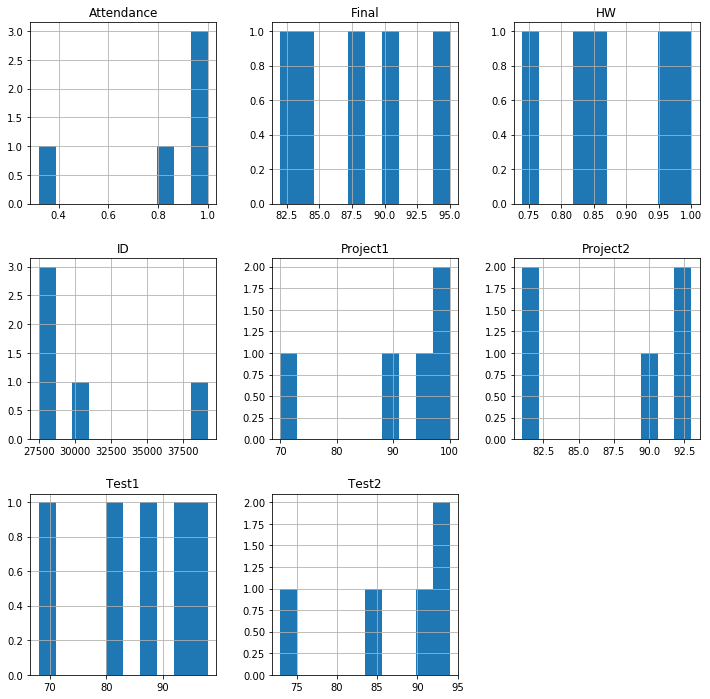

In [168]:
# Função hist()
df_student.hist(figsize=(12,12));

<b>Análise:</b> O Dataset _student-scores_ proporciona poucos dados. A análise fica prejudicada. Vamos tentar com o Dataset _powerplant_

### Powerplant

É importante ressaltar que, na sessão 4 de _Exploratory data Analysis_, alterações foram realizadas no Dataset _powerplant_, como por exemplo, mudança no header (label), entre outros. O arquivo a ser utilizado, para os testes gráficos, será o _powerplant-edited_.

In [16]:
# Importando biblioteca e lendo arquivo
import pandas as pd
% matplotlib inline

df_pp = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/powerplant_edited.csv')
df_pp.head()

Temperature Exhaust Vacuum Pressure     RH Energy Output
0       14,96          41,76  1024,07  73,17        463,26
1       25,18          62,96  1020,04  59,08        444,37
2        5,11           39,4  1012,16  92,14        488,56
3       20,86          57,32  1010,24  76,64        446,48
4       10,82           37,5  1009,23  96,62         473,9

In [17]:
# Verificando colunas numéricas
df_pp.describe()

Temperature Exhaust Vacuum Pressure      RH Energy Output
count         9568           9568     9568    9568          9568
unique        2773            634     2517    4546          4836
top          25,21          70,32  1013,88  100,09         468,8
freq            14             61       16      26             9

Estranhamente não foram retornados dados importantes como <b>média</b>, <b>max</b>, etc... Vamos investigar o motivo.

In [8]:
df_pp.dtypes

Temperature       object
Exhaust Vacuum    object
Pressure          object
RH                object
Energy Output     object
dtype: object

Está aí a resposta: os dados salvos neste Dataset estão em formato de string e não em formato numérico. Vejamos se o Dataset anterior à edição também está da mesma forma.

In [13]:
df_pp_pre = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/powerplant.csv', sep=';')
df_pp_pre.head()

AT      V       AP     RH      PE
0  14,96  41,76  1024,07  73,17  463,26
1  25,18  62,96  1020,04  59,08  444,37
2   5,11   39,4  1012,16  92,14  488,56
3  20,86  57,32  1010,24  76,64  446,48
4  10,82   37,5  1009,23  96,62   473,9

In [14]:
df_pp_pre.dtypes

AT    object
V     object
AP    object
RH    object
PE    object
dtype: object

Também encontra-se do mesmo jeito. Vamos tentar alterar as colunas pra que sejam do tipo numérico.

Fonte: https://stackoverflow.com/questions/15891038/change-data-type-of-columns-in-pandas

In [42]:
# Antes de tudo, transformar vírgulas em ponto
for value in df_pp:
    for i in range(df_pp.shape[0]):
        df_pp[value][i] = df_pp[value][i].replace(',','.')

AttributeError: 'numpy.float64' object has no attribute 'replace'

O erro acima é explicado pois esta conversão já foi realizada anteriormente.

In [43]:
# Aplicando conversão e verificando
df_pp = df_pp.astype(float)
df_pp.dtypes

Temperature       float64
Exhaust Vacuum    float64
Pressure          float64
RH                float64
Energy Output     float64
dtype: object

In [44]:
# Agora sim
df_pp.describe()

Temperature  Exhaust Vacuum     Pressure           RH  Energy Output
count  9568.000000     9568.000000  9568.000000  9568.000000    9568.000000
mean     19.651231       54.305804  1013.259078    73.308978     454.365009
std       7.452473       12.707893     5.938784    14.600269      17.066995
min       1.810000       25.360000   992.890000    25.560000     420.260000
25%      13.510000       41.740000  1009.100000    63.327500     439.750000
50%      20.345000       52.080000  1012.940000    74.975000     451.550000
75%      25.720000       66.540000  1017.260000    84.830000     468.430000
max      37.110000       81.560000  1033.300000   100.160000     495.760000

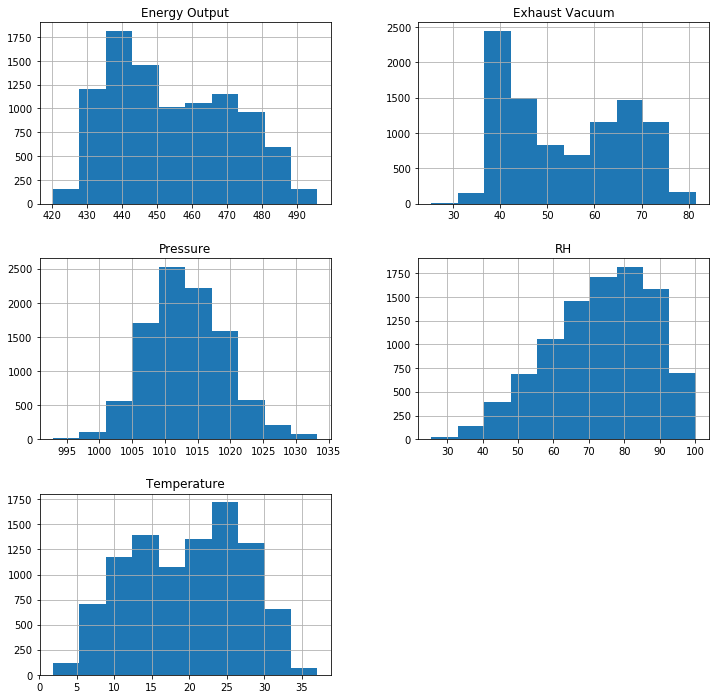

In [45]:
# Aplicando histograma
df_pp.hist(figsize=(12,12));

<b>Análise</b>: Visualização muito melhor. Claramente conseguimos perceber onde está a maior distribuição de cada coluna. Por exemplo, na _Umidade Relativa_, é possível concluir que os valores ficam concentrados na faixa de 70 a 90%. Já na Pressão, estes valores se concentram na faixa de 1010 a 1015 bar.

Link sobre distribuição normal: https://en.wikipedia.org/wiki/Normal_distribution

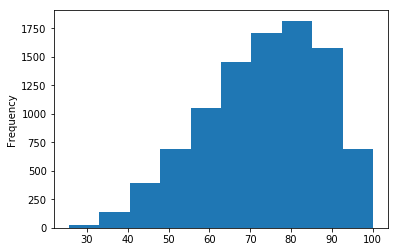

In [47]:
# Também é possível chamar histogramas em colunas específicas e de uma outra forma
df_pp['RH'].plot(kind='hist');

### Census Income

In [48]:
# Importando bibliotecas e lendo arquivo
import pandas as pd

df_census = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/census_income.csv')
df_census.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [49]:
# Verificando estatísticas
df_census.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

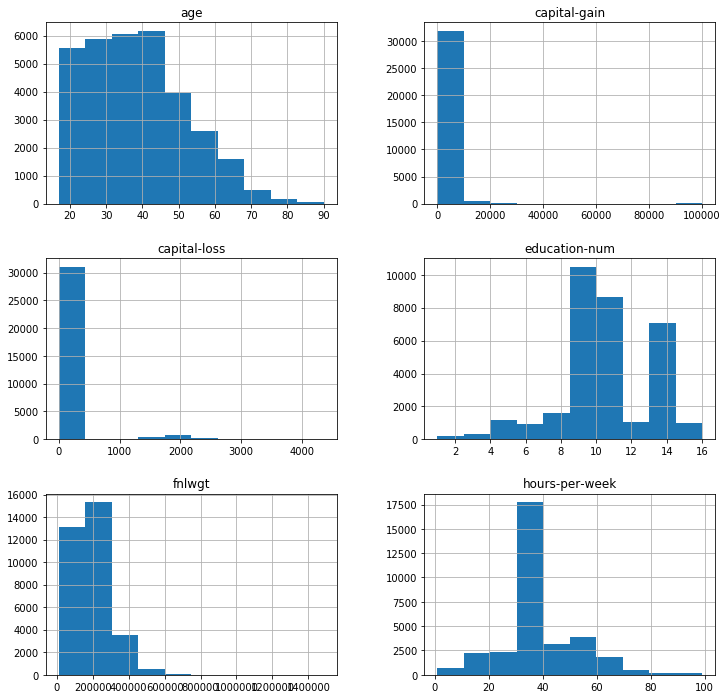

In [51]:
# Avaliando histograma
df_census.hist(figsize=(12, 12));

Alguns valores não ficaram legais. O atributo de melhor visualização para tirada de conclusões é o de idade. Vamos reservar uma última sessão para tentar retirar mais insights deste Dataset retomando algumas questões respondidas na sessão 4 de EDA.

## Barra

O gráfico de barra é adequado para comparar diversos valores. O eixo da dimensão mostra os itens da categoria que são comparados, e o eixo da medida mostra o valor de cada item da categoria. As barras empilhadas e agrupadas facilitam a visualização de dados agrupados. O gráfico de barra também é útil quando você quiser comparar valores lado a lado, como ao comparar as vendas com a previsão para diferentes anos, e quando as medidas (neste caso, vendas e previsão) são calculadas usando a mesma unidade.

Khan Academy: https://pt.khanacademy.org/math/cc-third-grade-math/cc-third-grade-measurement/cc-third-grade-data/a/create-bar-graphs

Qlik: https://help.qlik.com/pt-BR/sense/June2018/Subsystems/Hub/Content/Visualizations/Bar-Chart/bar-chart.htm

### Store Data

In [172]:
import pandas as pd

df_store = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/store-data.csv')
df_store.head()

week  storeA  storeB  storeC  storeD  storeE
0  2014-05-04    2643    8257    3893    6231    1294
1  2014-05-11    6444    5736    5634    7092    2907
2  2014-05-18    9646    2552    4253    5447    4736
3  2014-05-25    5960   10740    8264    6063     949
4  2014-06-01    7412    7374    3208    3985    3023

In [173]:
df_store.describe()

storeA        storeB       storeC       storeD       storeE
count    200.000000    200.000000   200.000000   200.000000   200.000000
mean    5865.480000   6756.710000  4942.105000  5431.405000  2580.025000
std     2958.230318   3601.339489  1325.407768  1183.111323  1725.651381
min      137.000000     14.000000   927.000000  2276.000000    39.000000
25%     3812.250000   3884.500000  4053.500000  4717.000000  1235.000000
50%     5713.500000   6771.000000  4962.500000  5382.000000  2522.000000
75%     7662.250000   9350.500000  5801.750000  6243.750000  3574.250000
max    14403.000000  15841.000000  8293.000000  8190.000000  7553.000000

In [174]:
# Retirando a coluna 'week' para plotar o somatório de vendas por loja.
df_stores = df_store.iloc[:, 1:]
df_stores.head()

storeA  storeB  storeC  storeD  storeE
0    2643    8257    3893    6231    1294
1    6444    5736    5634    7092    2907
2    9646    2552    4253    5447    4736
3    5960   10740    8264    6063     949
4    7412    7374    3208    3985    3023

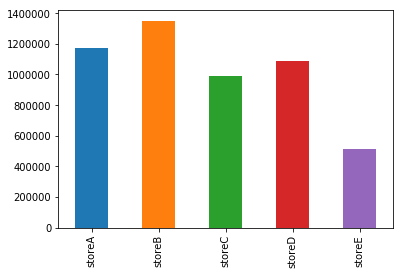

In [175]:
# Plotando gráfico de barras
df_stores.sum().plot(kind='bar');

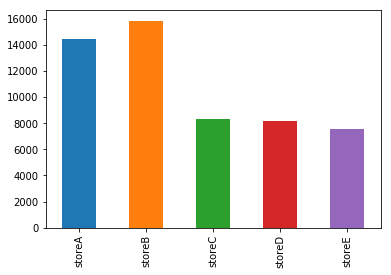

In [176]:
# Máximo de vendas de cada loja
df_stores.max().plot(kind='bar')

Vamos agora ter uma outra visão também contemplando a coluna 'week'

In [177]:
df_store.head()

week  storeA  storeB  storeC  storeD  storeE
0  2014-05-04    2643    8257    3893    6231    1294
1  2014-05-11    6444    5736    5634    7092    2907
2  2014-05-18    9646    2552    4253    5447    4736
3  2014-05-25    5960   10740    8264    6063     949
4  2014-06-01    7412    7374    3208    3985    3023

In [178]:
df_store.dtypes

week      object
storeA     int64
storeB     int64
storeC     int64
storeD     int64
storeE     int64
dtype: object

In [179]:
# Convertendo coluna 'week' para datetime
df_store['week'] = pd.to_datetime(df_store['week'])
df_store.dtypes

week      datetime64[ns]
storeA             int64
storeB             int64
storeC             int64
storeD             int64
storeE             int64
dtype: object

In [180]:
df_store.set_index('week', inplace=True)
df_store.head()

storeA  storeB  storeC  storeD  storeE
week                                              
2014-05-04    2643    8257    3893    6231    1294
2014-05-11    6444    5736    5634    7092    2907
2014-05-18    9646    2552    4253    5447    4736
2014-05-25    5960   10740    8264    6063     949
2014-06-01    7412    7374    3208    3985    3023

In [188]:
df_month = df_store.resample('M').sum()

In [189]:
df_month.head()

storeA  storeB  storeC  storeD  storeE
week                                              
2014-05-31   24693   27285   22044   24833    9886
2014-06-30   31884   41313   22535   25167   11754
2014-07-31   31392   14827   12695   19039    9227
2014-08-31   33083   34796   22034   29478   10824
2014-09-30   14623   27065   20089   23142    8292

In [191]:
# Agrupando valores de data em meses
df_month.index = df_month.index.strftime('%B')

Referência: https://stackoverflow.com/questions/32699950/how-to-convert-pandas-index-to-month-name

In [192]:
df_month.head(30)

storeA  storeB  storeC  storeD  storeE
May         24693   27285   22044   24833    9886
June        31884   41313   22535   25167   11754
July        31392   14827   12695   19039    9227
August      33083   34796   22034   29478   10824
September   14623   27065   20089   23142    8292
October     23214   32240   24499   25528    8439
November    32584   18971   23814   27391   14308
December    22864   19189   18687   20047    9417
January     20667   24797   19770   27199   12346
February    19593   16458   19832   21621   10220
March       40155   56675   30601   28309   17700
April        8626   22906   19270   25630   12776
May         18762   51574   24974   30044   19846
June        14811   26650   18328   23183   11376
July        17692   28420   20686   21466    8208
August      41549   12353   27256   26178   16909
September   21205   30393   19865   19789    7039
October     19323   33658   15134   18783    6356
November    35967   50016   26761   21747    6514
December    33140   27743   20965   18494   11240
January     22270   35665   23753   22344   15218
February    18714   28947   23476   19666   14341
March       22557   22172   17828   21288   10322
April       33367   37925   18497   19335   12926
May         26775   33040   22987   30235   13018
June        32882   21854   18778   21740   12907
July        25869   30247   28815   29954   13259
August      17984   28083   20210   22728    9645
September   19943   27618   15606   22502   13890
October     31193   26577   25798   22087    5030

Vimos que talvez seja melhor retornar o somatório por ano.

In [193]:
df_year = df_store.resample(rule="A").sum()

In [194]:
df_year.head()

storeA  storeB  storeC  storeD  storeE
week                                              
2014-12-31  214337  215686  166397  194625   82147
2015-12-31  291490  381643  263442  282443  140530
2016-12-31  290712  326142  254872  276396  137168
2017-12-31  329654  377628  267370  286049  137335
2018-12-31   46903   50243   36340   46768   18825

In [195]:
# Agrupando valores de data em meses
df_year.index = df_year.index.strftime('%Y')

Referência: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Period.strftime.html

Referência: http://strftime.org/

In [198]:
# Agrupando valores Mensais para contemplar o somatório de vendas de cada loja
df_year

storeA  storeB  storeC  storeD  storeE
2014  214337  215686  166397  194625   82147
2015  291490  381643  263442  282443  140530
2016  290712  326142  254872  276396  137168
2017  329654  377628  267370  286049  137335
2018   46903   50243   36340   46768   18825

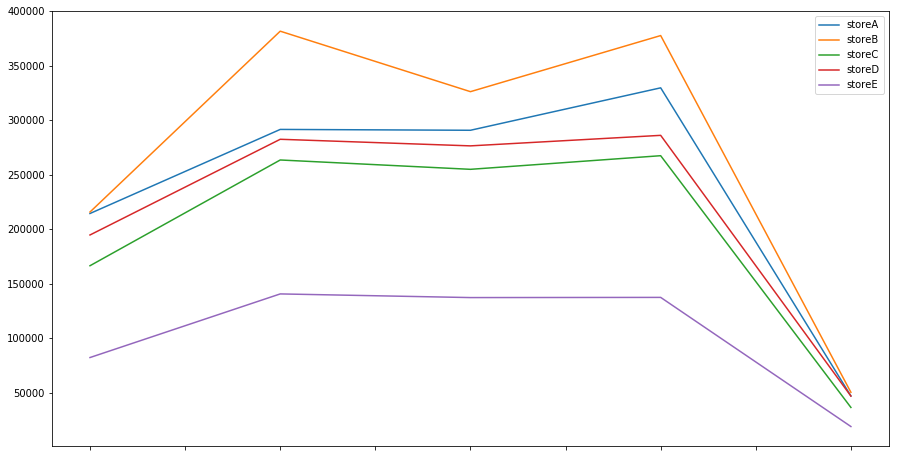

In [203]:
# Plotando visões
df_year.plot(figsize=(15, 8))

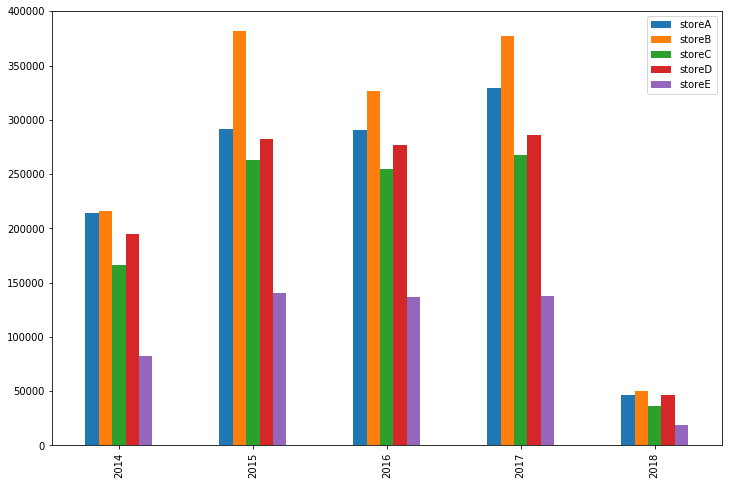

In [205]:
# Barras
df_year.plot(kind='bar', figsize=(12, 8))

## Pizza

O gráfico de pizza, também conhecido como gráfico de setores ou gráfico circular é um diagrama circular onde os valores de cada categoria estatística representada são proporcionais às respectivas frequências. Este gráfico pode vir acompanhado de porcentagens. É utilizado para dados qualitativos nominais. 

Link 1: http://www.portalaction.com.br/estatistica-basica/17-grafico-de-pizza

Link 2: https://docs.tibco.com/pub/spotfire_web_player/6.0.0-november-2013/pt-BR/WebHelp/GUID-8B1036A5-6BE9-4A84-B532-8E15060CABA9.html

### Chicago Bike Share

Vamos analisar o Dataset _chicago-bike-share_ para visualizar algumas informações em formato de Gráficos de Pizza.

In [206]:
# Importando bibliotecas e lendo arquivo
import pandas as pd

df_bike = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/chicago.csv')
df_bike.head()

Start Time             End Time  Trip Duration  \
0  2017-01-01 00:00:36  2017-01-01 00:06:32            356   
1  2017-01-01 00:02:54  2017-01-01 00:08:21            327   
2  2017-01-01 00:06:06  2017-01-01 00:18:31            745   
3  2017-01-01 00:07:28  2017-01-01 00:12:51            323   
4  2017-01-01 00:07:57  2017-01-01 00:20:53            776   

                          Start Station                   End Station  \
0                  Canal St & Taylor St      Canal St & Monroe St (*)   
1            Larrabee St & Menomonee St  Sheffield Ave & Kingsbury St   
2  Orleans St & Chestnut St (NEXT Apts)    Ashland Ave & Blackhawk St   
3               Franklin St & Monroe St        Clinton St & Tilden St   
4                  Broadway & Barry Ave       Sedgwick St & North Ave   

    User Type Gender  Birth Year  
0    Customer    NaN         NaN  
1  Subscriber   Male      1984.0  
2  Subscriber   Male      1985.0  
3  Subscriber   Male      1990.0  
4  Subscriber   Male      1990.0

Podemos criar uma vista com a porcentagem de alugueis de bicicleta por gênero.

In [207]:
# Utilizando a função value_counts() na coluna gender
df_bike['Gender'].value_counts()

Male      935854
Female    298784
Name: Gender, dtype: int64

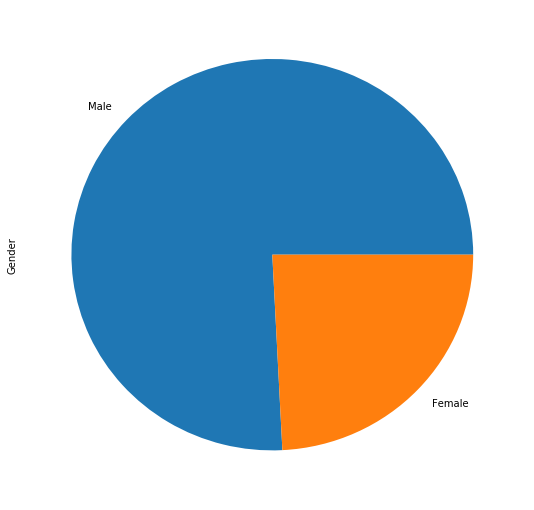

In [210]:
# Transformando em gráfico de pizza
df_bike['Gender'].value_counts().plot(kind='pie', figsize=(9,9));

Podemos realizar o mesmo para os User Types

In [211]:
df_bike.head()

Start Time             End Time  Trip Duration  \
0  2017-01-01 00:00:36  2017-01-01 00:06:32            356   
1  2017-01-01 00:02:54  2017-01-01 00:08:21            327   
2  2017-01-01 00:06:06  2017-01-01 00:18:31            745   
3  2017-01-01 00:07:28  2017-01-01 00:12:51            323   
4  2017-01-01 00:07:57  2017-01-01 00:20:53            776   

                          Start Station                   End Station  \
0                  Canal St & Taylor St      Canal St & Monroe St (*)   
1            Larrabee St & Menomonee St  Sheffield Ave & Kingsbury St   
2  Orleans St & Chestnut St (NEXT Apts)    Ashland Ave & Blackhawk St   
3               Franklin St & Monroe St        Clinton St & Tilden St   
4                  Broadway & Barry Ave       Sedgwick St & North Ave   

    User Type Gender  Birth Year  
0    Customer    NaN         NaN  
1  Subscriber   Male      1984.0  
2  Subscriber   Male      1985.0  
3  Subscriber   Male      1990.0  
4  Subscriber   Male      1990.0

In [212]:
df_bike['User Type'].value_counts()

Subscriber    1234339
Customer       317162
Dependent           4
Name: User Type, dtype: int64

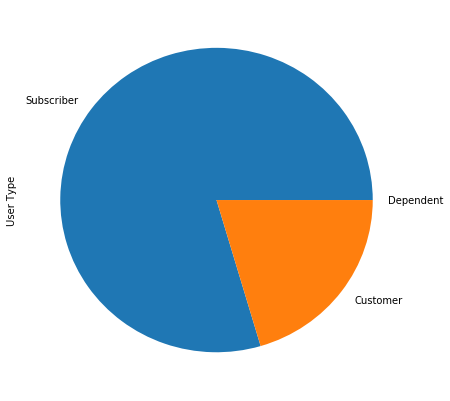

In [214]:
df_bike['User Type'].value_counts().plot(kind='pie', figsize=(7, 7));

## Dispersão

Gráfico de Dispersão são utilizados para pontuar dados em um eixo vertical e horizontal com a intenção de exibir quanto uma variável é afetada por outra.

Cada linha na tabela de dados é representada por um marcador cuja posição depende dos seus valores nas colunas determinados nos eixos X e Y. Múltiplas escalas podem ser utilizadas no eixo Y para quando você quiser comparar diversos marcadores com faixas de valores significativamente diferentes. Uma terceira variável pode ser configurada para corresponder a cor ou ao tamanho (por ex., um gráfico de bolhas) dos marcadores, então adicionar outra dimensão ao gráfico.

A relação entre duas variáveis é chamada de correlação. Se os marcadores estão próximos a formar uma linha reta no gráfico de dispersão, as duas variáveis possuem uma alta correlação. Se os marcadores estiverem igualmente distribuídos no gráfico de dispersão, a correlação é baixa, ou zero. Entretanto, mesmo se a correlação pareça estar presente, esse pode não ser o caso. Ambas as variáveis podem estar relacionadas a uma terceira variável, então expandir a sua variação ou uma pura coincidência pode causar uma aparente correlação.

Se aplicado quando uma análise é criada, o gráfico de dispersão pode exibir informação adicional em linhas de referência ou em diferentes tipos de curvas. Estas linhas ou curvas podem, por exemplo, exibir quão bem os seus dados se adaptam a certo ajuste de curva polinomial ou para resumir uma coleção de pontos de dados amostrais ajustando-os a um modelo que descreverá os dados e exibirá uma curva ou uma linha reta no topo da visualização. A curva normalmente modifica a aparência dependendo de quais valores você filtrou na análise. Ao passar o mouse, uma dica mostra como a curva é calculada.

Referências: 

https://docs.tibco.com/pub/spotfire_web_player/6.0.0-november-2013/pt-BR/WebHelp/GUID-780960FA-1DCE-4E59-8EB7-54F7144DB362.html

[Tipos-de-correlacao](http://www.futebolmetria.com/correla--o-estat-stica.html)

https://www.emathzone.com/tutorials/basic-statistics/positive-and-negative-correlation.html

### Cancer Data

In [217]:
# Importando biblioteca e lendo arquivo
import pandas as pd
% matplotlib inline

df_cancer = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/cancer_means.csv')
df_cancer.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99     19.293431          122.80     1001.0   
1         M        20.57     17.770000          132.90     1326.0   
2         M        19.69     21.250000          130.00     1203.0   
3         M        11.42     20.380000           77.58      386.1   
4         M        20.29     14.340000          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3              NaN           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  
0         0.2419                 0.07871  
1         0.1812                 0.05667  
2         0.2069                 0.05999  
3         0.2597                 0.09744  
4         0.1809                 0.05883

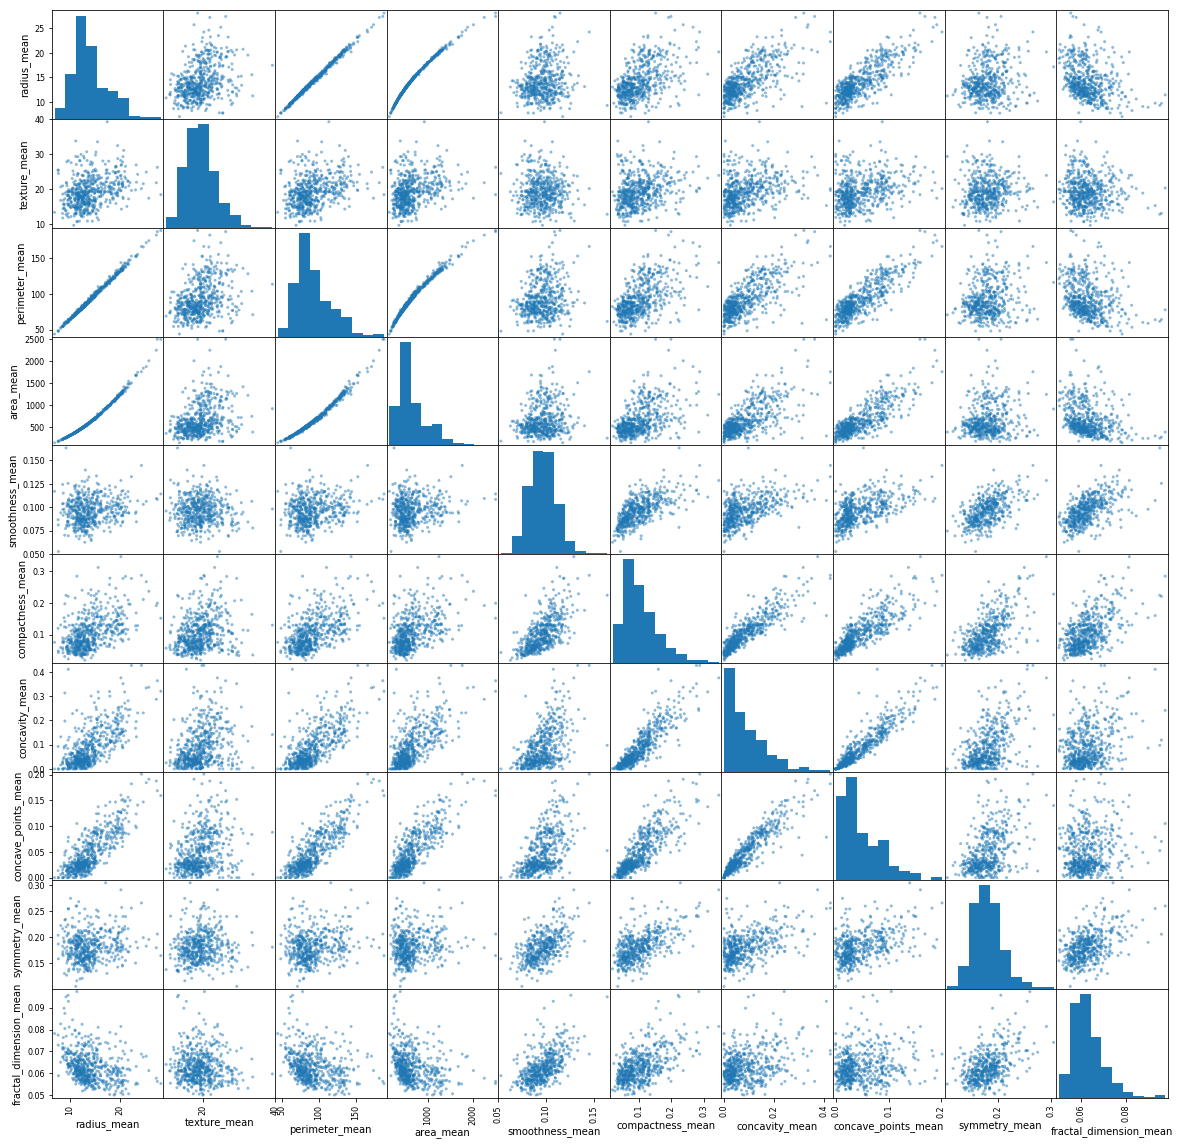

In [223]:
# Abaixo, usaremos uma função capaz de identificar todas as colunas numéricas do Dataset e mostrar correlações.
# A função retorna um gráfico de Dispersão e um Histograma para cada coluna do Dataset.

pd.plotting.scatter_matrix(df_cancer, figsize=(20, 20));

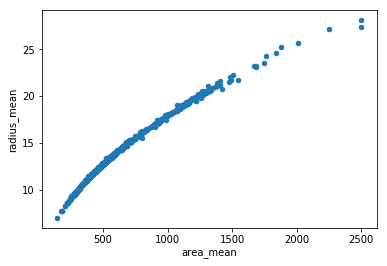

In [225]:
# Também é possível visualizar gráficos de Dispersão entre duas variáveis apenas
df_cancer.plot(x='area_mean', y='radius_mean', kind='scatter');

Correlação extremamente <b>direta</b> entre Área e Raio de um tumor.

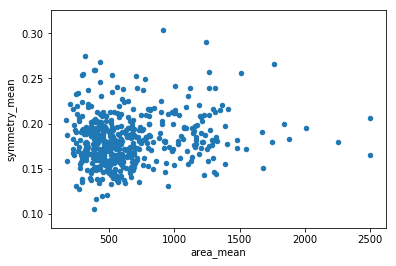

In [226]:
df_cancer.plot(x='area_mean', y='symmetry_mean', kind='scatter');

Sem correlação alguma entre Área e Simetria.

### Wine Data

In [227]:
# Importando biblioteca e lendo arquivo
import pandas as pd
% matplotlib inline

# Vinho tinto
df_red = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/winequality-red.csv', sep=';')
df_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

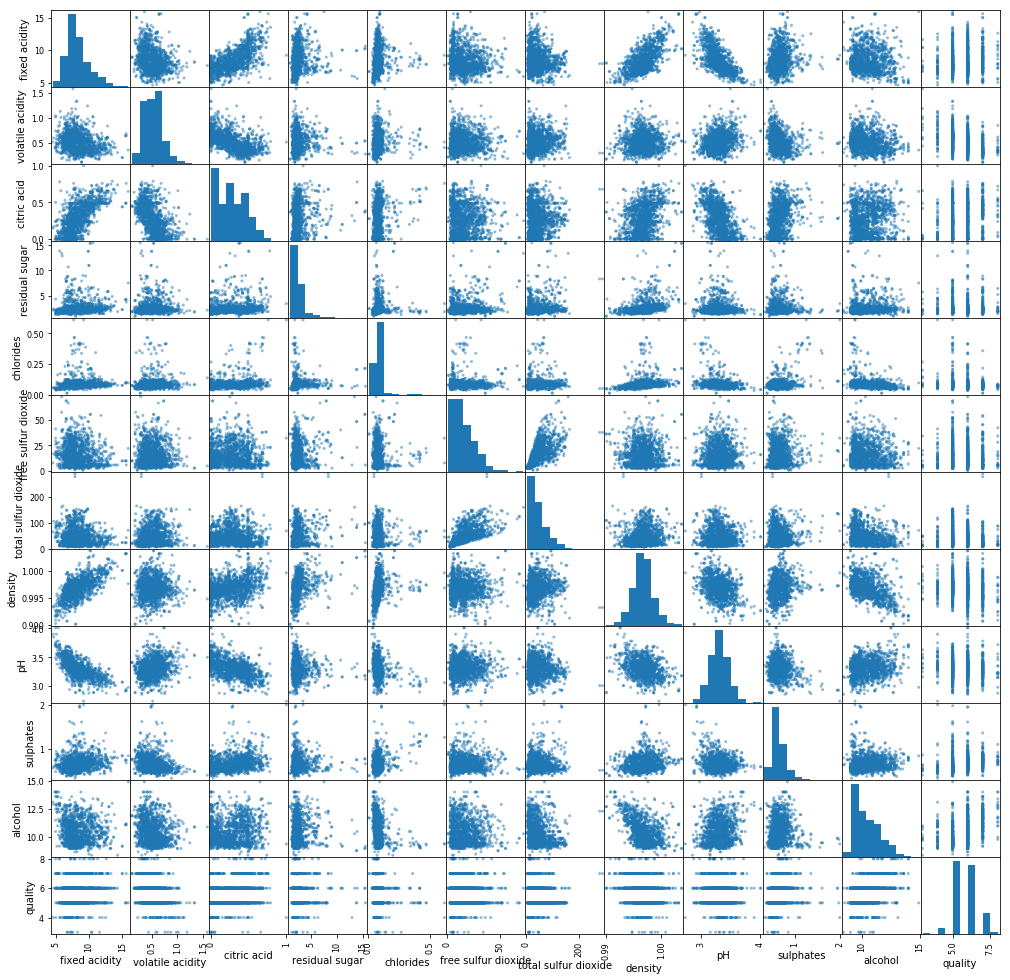

In [229]:
# Visão geral
pd.plotting.scatter_matrix(df_red, figsize=(17, 17));

In [230]:
df_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

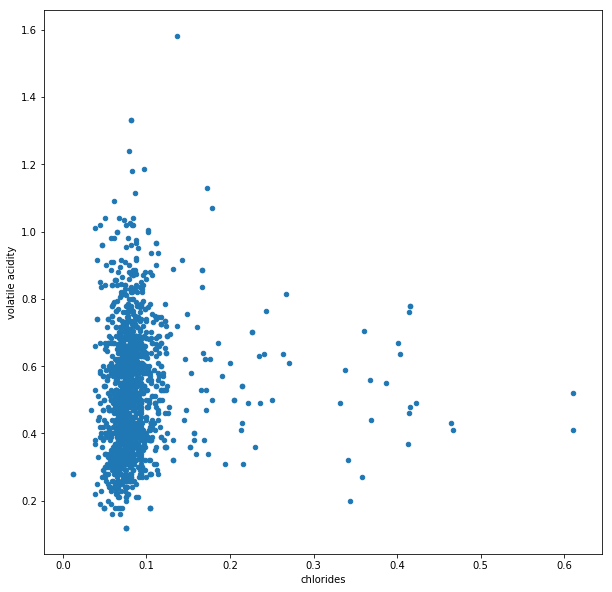

In [233]:
# Verificando individualmente
df_red.plot(kind='scatter', x='chlorides', y='volatile acidity', figsize=(10, 10));

<b>Explicação teórica:</b>

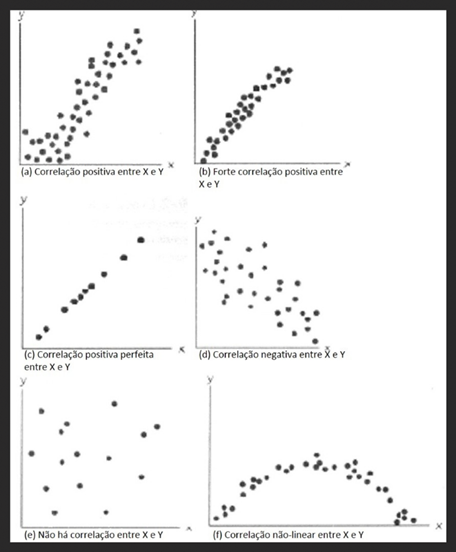

## Box Plot

O boxplot (gráfico de caixa) é um gráfico utilizado para avaliar a distribuição empírica do dados. O boxplot é formado pelo primeiro e terceiro quartil e pela mediana. As hastes inferiores e superiores se estendem, respectivamente, do quartil inferior até o menor valor não inferior ao limite inferior e do quartil superior até o maior valor não superior ao limite superior. 

Referências:

http://www.portalaction.com.br/estatistica-basica/31-boxplot

https://en.wikipedia.org/wiki/Outlier

https://www.r-statistics.com/2011/01/how-to-label-all-the-outliers-in-a-boxplot/

### Powerplant

In [234]:
# Importando biblioteca e lendo arquivo
import pandas as pd
% matplotlib inline

df_pp = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/powerplant_edited.csv')
df_pp.head()

Temperature Exhaust Vacuum Pressure     RH Energy Output
0       14,96          41,76  1024,07  73,17        463,26
1       25,18          62,96  1020,04  59,08        444,37
2        5,11           39,4  1012,16  92,14        488,56
3       20,86          57,32  1010,24  76,64        446,48
4       10,82           37,5  1009,23  96,62         473,9

In [237]:
# Verificando tipos
df_pp.dtypes

Temperature       object
Exhaust Vacuum    object
Pressure          object
RH                object
Energy Output     object
dtype: object

In [235]:
# Precisamos converter todos os dados em float, porém, antes de tudo, transformar vírgulas em ponto
for value in df_pp:
    for i in range(df_pp.shape[0]):
        df_pp[value][i] = df_pp[value][i].replace(',','.')

In [238]:
# Verificando
df_pp.head()

Temperature Exhaust Vacuum Pressure     RH Energy Output
0       14.96          41.76  1024.07  73.17        463.26
1       25.18          62.96  1020.04  59.08        444.37
2        5.11           39.4  1012.16  92.14        488.56
3       20.86          57.32  1010.24  76.64        446.48
4       10.82           37.5  1009.23  96.62         473.9

In [239]:
# Convertendo string em float
df_pp = df_pp.astype(float)
df_pp.dtypes

Temperature       float64
Exhaust Vacuum    float64
Pressure          float64
RH                float64
Energy Output     float64
dtype: object

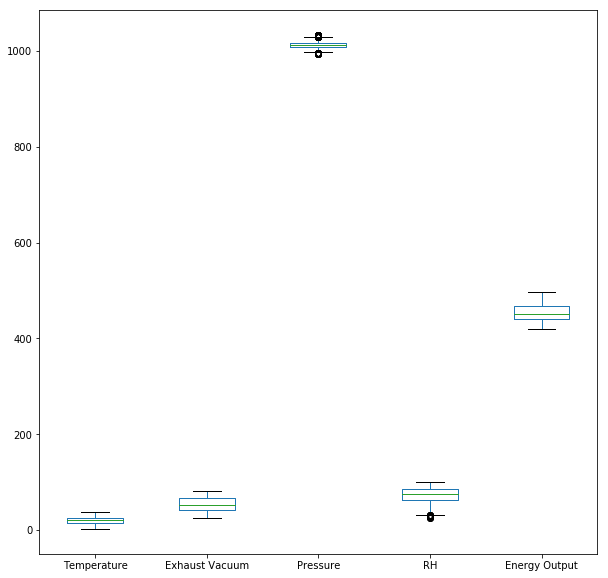

In [240]:
# Plotando gráfico de caixa 
df_pp.plot(kind='box', figsize=(10, 10))

Identificar _Outliers_ no gráfico de Caixa.

# Complete Conclusion Examples

## Tumor size and malignancy

Analisando novamente o Dataset _cancer-data_, vamos verificar se o tamanho do tumor afeta seu diagnóstico (Benigno ou Maligno). Para tal, utilizaremos todos os conceitos abordados até aqui, incluindo estatísticas descritivas e visualização de dados para tomada de decisão.

In [241]:
import pandas as pd
% matplotlib inline

df_cancer = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/cancer_means.csv')
df_cancer.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99     19.293431          122.80     1001.0   
1         M        20.57     17.770000          132.90     1326.0   
2         M        19.69     21.250000          130.00     1203.0   
3         M        11.42     20.380000           77.58      386.1   
4         M        20.29     14.340000          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3              NaN           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  
0         0.2419                 0.07871  
1         0.1812                 0.05667  
2         0.2069                 0.05999  
3         0.2597                 0.09744  
4         0.1809                 0.05883

Neste caso, o ideal é dividir o Dataset em dois novos Datasets, contemplando aqueles cujo diagnóstico é _Benigno_ e aqueles cujo diagnóstico é _Maligno_. Dessa forma, será possível comparar o atributo _area_ em ambos.

In [242]:
# Split tumores benignos
df_b = df_cancer[df_cancer['diagnosis'] == 'B']
df_b.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
19         B       13.540         14.36           87.46      566.3   
20         B       13.080         15.71           85.63      520.0   
21         B        9.504         12.44           60.34      273.9   
37         B       13.030         18.42           82.61      523.8   
40         B       12.670         17.30           81.25      489.9   

    smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
19          0.09779           0.08129         0.06664              0.04781   
20          0.10750           0.12700         0.04568              0.03110   
21          0.10240           0.06492         0.02956              0.02076   
37          0.08983           0.03766         0.02562              0.02923   
40          0.10280           0.07664         0.03193              0.02107   

    symmetry_mean  fractal_dimension_mean  
19         0.1885                 0.05766  
20         0.1967                 0.06811  
21         0.1815                 0.06905  
37         0.1467                 0.05863  
40         0.1707                 0.05984

In [243]:
# Split tumores malignos
df_m = df_cancer[df_cancer['diagnosis'] == 'M']
df_m.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99     19.293431          122.80     1001.0   
1         M        20.57     17.770000          132.90     1326.0   
2         M        19.69     21.250000          130.00     1203.0   
3         M        11.42     20.380000           77.58      386.1   
4         M        20.29     14.340000          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3              NaN           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  
0         0.2419                 0.07871  
1         0.1812                 0.05667  
2         0.2069                 0.05999  
3         0.2597                 0.09744  
4         0.1809                 0.05883

In [246]:
# Avaliando a coluna area em cada um dos DataFrames
print(f"Área média de tumores Benignos: {df_b['area_mean'].mean():.2f}")
print(f"Área média de tumores Malignos: {df_m['area_mean'].mean():.2f}")

Área média de tumores Benignos: 462.71
Área média de tumores Malignos: 976.58


Já neste instante, é possível perceber que, em média, a área de tumores Malignos são maiores que a área de tumores Benignos. Porém, visualizar isso em forma de gráficos seria muito mais prático. Vejamos.

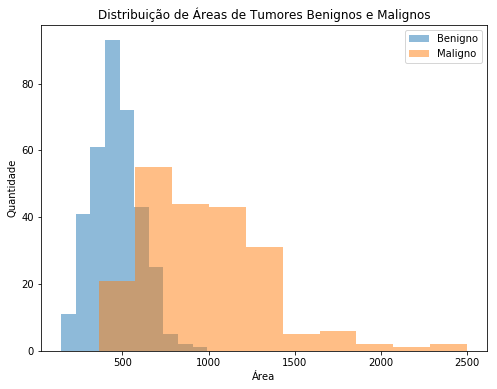

In [247]:
# Utilizando matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df_b['area_mean'], alpha=0.5, label='Benigno')
ax.hist(df_m['area_mean'], alpha=0.5, label='Maligno')
ax.set_title('Distribuição de Áreas de Tumores Benignos e Malignos')
ax.set_xlabel('Área')
ax.set_ylabel('Quantidade')
ax.legend(loc='upper right')
plt.show()

Extremamente interessante como a distribuição em formato de Histograma nos levou a mesma conclusão. A distribuição de área de tumores Malignos encontram-se com valores maiores que a distribuição de área de tumores Benignos.

## Census income _versus_ age

Neste exemplo, vamos retormar a análise do dataset _census-income-data_ para verificar se os ganhos anuais estão relacionados com algum atributo presente no próprio dataset, como por exemplo, a idade.

In [1]:
# Importando bibliotecas e lendo arquivo
import pandas as pd
% matplotlib inline

df_census = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/census_income.csv')
df_census.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

<b>Primeira tarefa:</b> Separar o dataset em dois diferentes DataFrames, o primeiro contendo aqueles cujo atribuo _income_ é inferior ou igual a 50k (<=50k) e, o segundo, com os demais.

In [4]:
# Separando dataset
df_humble = df_census[df_census['income'] == ' <=50K']
df_rich = df_census[df_census['income'] == ' >50K']

In [5]:
# Verificando alterações
df_humble.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [7]:
df_rich.head()

age          workclass  fnlwgt      education  education-num  \
7    52   Self-emp-not-inc  209642        HS-grad              9   
8    31            Private   45781        Masters             14   
9    42            Private  159449      Bachelors             13   
10   37            Private  280464   Some-college             10   
11   30          State-gov  141297      Bachelors             13   

         marital-status        occupation    relationship  \
7    Married-civ-spouse   Exec-managerial         Husband   
8         Never-married    Prof-specialty   Not-in-family   
9    Married-civ-spouse   Exec-managerial         Husband   
10   Married-civ-spouse   Exec-managerial         Husband   
11   Married-civ-spouse    Prof-specialty         Husband   

                   race      sex  capital-gain  capital-loss  hours-per-week  \
7                 White     Male             0             0              45   
8                 White   Female         14084             0              50   
9                 White     Male          5178             0              40   
10                Black     Male             0             0              80   
11   Asian-Pac-Islander     Male             0             0              40   

    native-country income  
7    United-States   >50K  
8    United-States   >50K  
9    United-States   >50K  
10   United-States   >50K  
11           India   >50K

<b>Análise 1:</b> Vamos verificar se os níveis de educação são semelhantes para estes dois DataFrames

In [8]:
# Educação income <=50K
df_humble['education'].value_counts()

 HS-grad         8826
 Some-college    5904
 Bachelors       3134
 11th            1115
 Assoc-voc       1021
 10th             871
 Assoc-acdm       802
 Masters          764
 7th-8th          606
 9th              487
 12th             400
 5th-6th          317
 1st-4th          162
 Prof-school      153
 Doctorate        107
 Preschool         51
Name: education, dtype: int64

In [9]:
# Educação incoma >50K
df_rich['education'].value_counts()

 Bachelors       2221
 HS-grad         1675
 Some-college    1387
 Masters          959
 Prof-school      423
 Assoc-voc        361
 Doctorate        306
 Assoc-acdm       265
 10th              62
 11th              60
 7th-8th           40
 12th              33
 9th               27
 5th-6th           16
 1st-4th            6
Name: education, dtype: int64

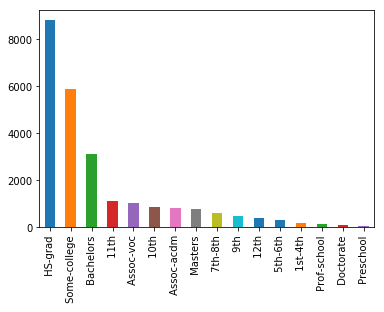

In [11]:
# Visualizando em formato gráfico
df_humble['education'].value_counts().plot(kind='bar');

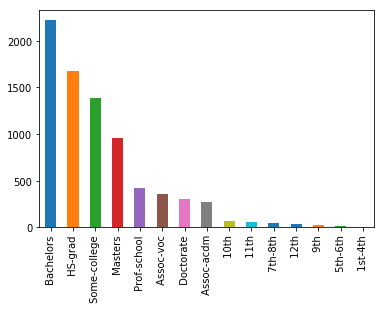

In [12]:
df_rich['education'].value_counts().plot(kind='bar');

Detalhe importante: os índices não são os mesmos! Para uma comparação justa, é necessário fixar os índices nos dois gráficos, para evitar a avaliação 'default' do maior para o menor.

In [14]:
# Mostrando índice do DataFrame humilde
ind = df_humble['education'].value_counts().index
ind

Index([' HS-grad', ' Some-college', ' Bachelors', ' 11th', ' Assoc-voc',
       ' 10th', ' Assoc-acdm', ' Masters', ' 7th-8th', ' 9th', ' 12th',
       ' 5th-6th', ' 1st-4th', ' Prof-school', ' Doctorate', ' Preschool'],
      dtype='object')

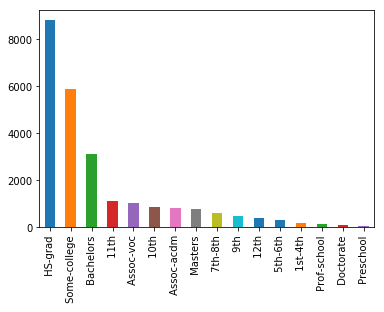

In [15]:
# Refazendo gráficos com índices corretos
df_humble['education'].value_counts()[ind].plot(kind='bar');

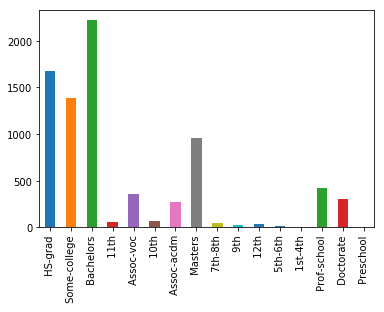

In [16]:
df_rich['education'].value_counts()[ind].plot(kind='bar');

Vamos avaliar agora o resultado em formato de gráfico de <b>Pizza</b> para visualizar as classes (workclass) dominantes em cada grupo.

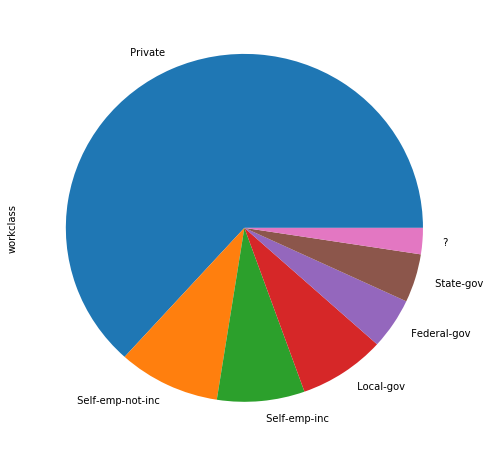

In [21]:
# Setando indice e printando gráfico
ind = df_rich['workclass'].value_counts().index
df_rich['workclass'].value_counts()[ind].plot(kind='pie', figsize=(8, 8));

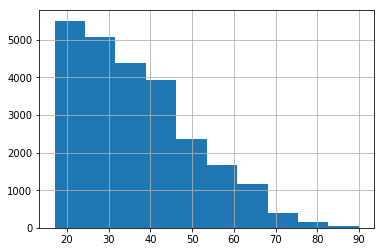

In [22]:
# Visualizando distribuição de idades (histograma)
df_humble['age'].hist();

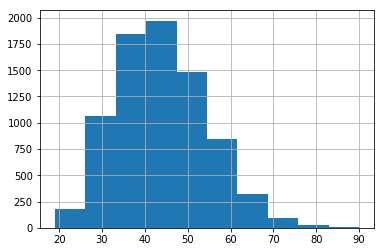

In [23]:
# Ricos
df_rich['age'].hist();

In [24]:
# Comprovando resultados
df_humble['age'].describe()

count    24720.000000
mean        36.783738
std         14.020088
min         17.000000
25%         25.000000
50%         34.000000
75%         46.000000
max         90.000000
Name: age, dtype: float64

In [25]:
df_rich['age'].describe()

count    7841.000000
mean       44.249841
std        10.519028
min        19.000000
25%        36.000000
50%        44.000000
75%        51.000000
max        90.000000
Name: age, dtype: float64

<b> Análise Final:</b> Muito interessante como o gráfico de distribuição em formato de Histograma mostrou que, geralmente, pessoas que ganham mais (>50K) são mais velhas do que pessoas que ganham menos (<=50K). A média de idade daqueles com menor poder aquisitvo é de 37 anos, enquanto a média de idade daqueles com maior condição financeira se aproxima dos 44 anos.

# High Level Pandas

## Append / Merge

In [23]:
# Importando bibliotecas e lendo arquivos
import numpy as np
import pandas as pd

df_red = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/winequality-red.csv', sep=';')
df_white = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/winequality-white.csv', sep=';')

In [24]:
# Verificando DataFrame de Vinho Tinto
df_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [25]:
# Verificando DataFrame de Vinho Branco
df_white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

<b>Juntando DataFrames: </b>

Nesta etapa da análise, deseja-se juntar o conteúdo presente no DataFrame de Vinho Tinto *(df_red)* com o conteúdo presendo no DataFrame de Binho Branco *(df_white)*. Para tal, será necessário criar uma nova <b>coluna</b> ou <b>atributo</b> em cada um dos DataFrames, indicando se este é Vinho Tinto ou Vinho Branco (coluna _color_).

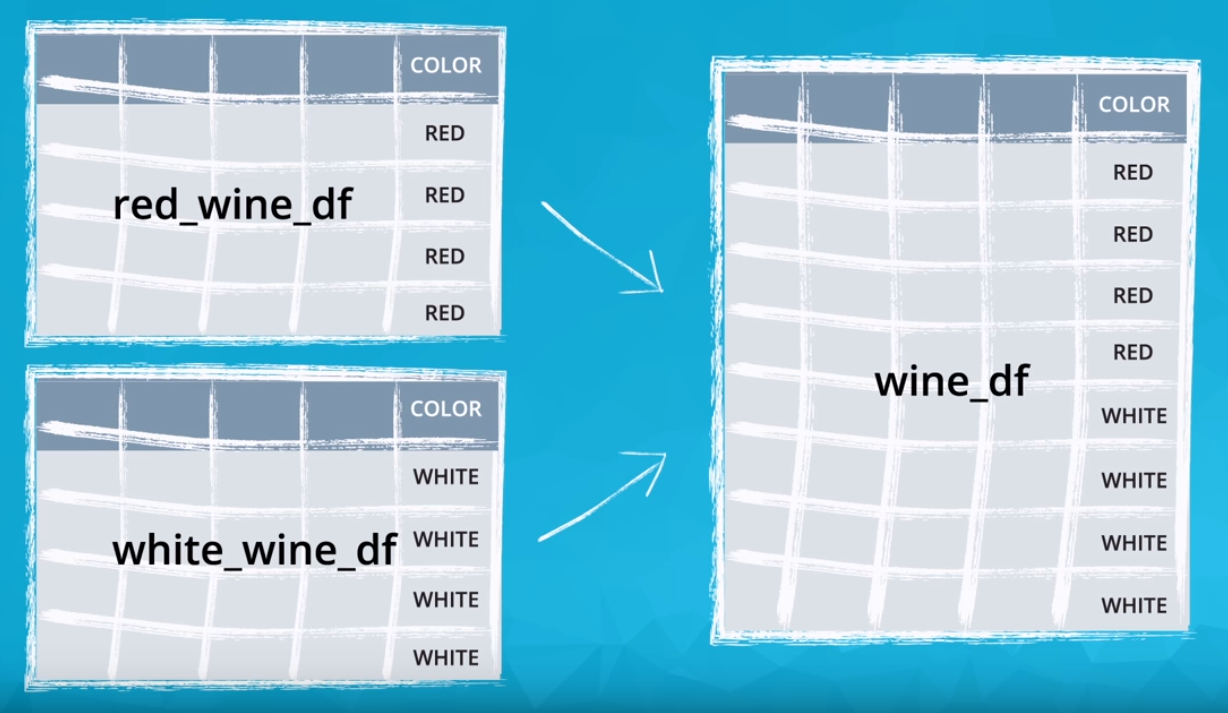

Utilizando o objeto array do NumPy com a função .repeat() com a seguinte sintaxe

*var = np.repeat(<b>np.array, qtd_repeat</b>)*

Referência: https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html

In [26]:
# Criando arrays para serem inseridos como colunas em cada um dos DataFrames
color_red = np.repeat(np.array(['red']), df_red.shape[0])
color_white = np.repeat(np.array(['white']), df_white.shape[0])

Explicando a sintaxe:

* Primeiro arguemnto: array de uma única string (red/white).
* Segundo argumento: número de repetições, ou seja, a quantidade de linhas de cada um dos respectivos DataFrames

In [27]:
# Vejamos (Vinho Tinto)
color_red

array(['red', 'red', 'red', ..., 'red', 'red', 'red'], dtype='<U3')

In [28]:
# Vejamos (Vinho Branco)
color_white

array(['white', 'white', 'white', ..., 'white', 'white', 'white'],
      dtype='<U5')

In [29]:
# Quantidade de linhas de cada um 
print(f'Quantidade de linhas do DataFrame de Vinho Tinto: {df_red.shape[0]}')
print(f'Quantidade de elementos do Array "red": {color_red.shape}')
print()
print(f'Quantidade de linhas do DataFrame de Vinho Branco: {df_white.shape[0]}')
print(f'Quantidade de elementos do Array "white": {color_white.shape}')

Quantidade de linhas do DataFrame de Vinho Tinto: 1599
Quantidade de elementos do Array "red": (1599,)

Quantidade de linhas do DataFrame de Vinho Branco: 4898
Quantidade de elementos do Array "white": (4898,)


Com os dois arrays corretamente criados, basta inserir, em cada um dos DataFrames, uma nova coluna contendo o respectivo Array.

In [30]:
# Inserindo arrays nos DataFrames
df_red['color'] = color_red
df_white['color'] = color_white

In [31]:
# Verificando Vinho Tinto
df_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [32]:
# Verificando Vinho Branco
df_white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  color  
0      8.8        6  white  
1      9.5        6  white  
2     10.1        6  white  
3      9.9        6  white  
4      9.9        6  white

Foi criada uma coluna auxiliar de nome <b>color</b> em cada um dos DataFrames. Neste ponto, estamos aptos a unir os DataFrames sem que as informações sejam misturadas.

Referências:

* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html

* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html

* http://pandas.pydata.org/pandas-docs/stable/merging.html

In [33]:
# Unindo DataFrames pelo método append
df_wine = df_red.append(df_white)

In [34]:
# Testando append
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

Aparentemente, tudo saiu como o esperado. Porém, alguns erros podem passar despercebidos. Imagine que houvesse um erro de digitação em uma coluna de um dos dois DataFrames unidos, como por exemplo *total_sulfur_dioxide* contra *total_sulfur-dioxide*. Esta diferença seria suficiente para criar uma nova coluna no DataFrame unido repleta de valores _NaN_. 

Vamos verificar numericamente se as quantidades de linhas e colunas batem

In [35]:
# Verificando append nas linhas.

print(f'Número de linhas de df_red: {df_red.shape[0]}')
print(f'Número de linhas de df_white: {df_white.shape[0]}')
print(f'Soma: {(df_red.shape[0] + df_white.shape[0])}')
print(f'Número de linhas do novo DataFrame df_wine: {df_wine.shape[0]}')
print(f'Números são iguais? {df_wine.shape[0] == (df_red.shape[0] + df_white.shape[0])}')

Número de linhas de df_red: 1599
Número de linhas de df_white: 4898
Soma: 6497
Número de linhas do novo DataFrame df_wine: 6497
Números são iguais? True


In [36]:
# Verificando append nas colunas (lembrando que elas não se somam, ou seja, DEVEM permanecer iguais após o append).
print(f'Número de colunas de df_red: {df_red.shape[1]}')
print(f'Número de coluas de df_white: {df_white.shape[1]}')
print(f'Número de colunas do novo DataFrame df_wine: {df_wine.shape[1]}')
print(f'Números batem? {df_red.shape[1] == df_white.shape[1] and df_red.shape[1] == df_wine.shape[1] and df_white.shape[1] == df_wine.shape[1]}')

Número de colunas de df_red: 13
Número de coluas de df_white: 13
Número de colunas do novo DataFrame df_wine: 13
Números batem? True


In [38]:
# /agora que está tudo OK, vamos salvar o novo Dataset
df_wine.to_csv('C:/Users/thiagoPanini/Downloads/datasets/winequality-edited.csv', index=False)

Referências caso alguma coisa dê errado no nome das colunas:

https://stackoverflow.com/questions/20868394/changing-a-specific-column-name-in-pandas-dataframe

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html

## Groupby

A função *groupby* é uma das mais dinâmicas do conjunto de funções do Pandas. Através da agregação de informações a respeito de grupos específicos presentes no DataFrame, é possível visualizar insights mais ricos, como por exemplo atributos característicos de cada classe/grupo/label.

Também é possível realizar manipulações e transformações em grupos específicos de dados.

Referências:

* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html

* https://pandas.pydata.org/pandas-docs/stable/groupby.html

Vejamos algumas estatísticas em grupos específicos através do Dataset *winequality*.

In [39]:
# Importando bibliotecas e lendo arquivo
import pandas as pd

df_wine = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/winequality-edited.csv')
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [40]:
# Verificando algumas estatísticas gerais
df_wine.mean()

fixed acidity             7.215307
volatile acidity          0.339666
citric acid               0.318633
residual sugar            5.443235
chlorides                 0.056034
free sulfur dioxide      30.525319
total sulfur dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
quality                   5.818378
dtype: float64

In [41]:
# Utilizando o describe
df_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

Imagine que desejamos visualizar a média de pH apenas das amostras classificadas com <b>qualidade=7</b>? Isso seria possível? Com o groupby, sim.

In [43]:
df_wine.groupby('quality').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             7.853333          0.517000     0.281000        5.140000   
4             7.288889          0.457963     0.272315        4.153704   
5             7.326801          0.389614     0.307722        5.804116   
6             7.177257          0.313863     0.323583        5.549753   
7             7.128962          0.288800     0.334764        4.731696   
8             6.835233          0.291010     0.332539        5.382902   
9             7.420000          0.298000     0.386000        4.120000   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.077033            39.216667            122.033333  0.995744   
4         0.060056            20.636574            103.432870  0.994833   
5         0.064666            30.237371            120.839102  0.995849   
6         0.054157            31.165021            115.410790  0.994558   
7         0.045272            30.422150            108.498610  0.993126   
8         0.041124            34.533679            117.518135  0.992514   
9         0.027400            33.400000            116.000000  0.991460   

               pH  sulphates    alcohol  
quality                                  
3        3.257667   0.506333  10.215000  
4        3.231620   0.505648  10.180093  
5        3.212189   0.526403   9.837783  
6        3.217726   0.532549  10.587553  
7        3.228072   0.547025  11.386006  
8        3.223212   0.512487  11.678756  
9        3.308000   0.466000  12.180000

In [45]:
# Perceba que sem a função .mean(), o groupby retorna:
df_wine.groupby('quality')

Com a união do groupby com algum método estatístico, como .mean(), é possível visualizar os resultados agrupados. Excelente.

Adicionalmente, é possível *splitar* ou dividir o DataFrame utilizando mais de um atributo como argumento do <b>groupby</b>. A vantagem é que além de visualizar os dados por um grupo (qualidade), também é possível visualizar por dois grupos (qualidade e cor, por exemplo).

In [47]:
# Splitando DataFrame com groupby
df_wine.groupby(['quality', 'color']).mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality color                                                                 
3       red         8.360000          0.884500     0.171000        2.635000   
        white       7.600000          0.333250     0.336000        6.392500   
4       red         7.779245          0.693962     0.174151        2.694340   
        white       7.129448          0.381227     0.304233        4.628221   
5       red         8.167254          0.577041     0.243686        2.528855   
        white       6.933974          0.302011     0.337653        7.334969   
6       red         8.347179          0.497484     0.273824        2.477194   
        white       6.837671          0.260564     0.338025        6.441606   
7       red         8.872362          0.403920     0.375176        2.720603   
        white       6.734716          0.262767     0.325625        5.186477   
8       red         8.566667          0.423333     0.391111        2.577778   
        white       6.657143          0.277400     0.326514        5.671429   
9       white       7.420000          0.298000     0.386000        4.120000   

               chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality color                                                                   
3       red     0.122500            11.000000             24.900000  0.997464   
        white   0.054300            53.325000            170.600000  0.994884   
4       red     0.090679            12.264151             36.245283  0.996542   
        white   0.050098            23.358896            125.279141  0.994277   
5       red     0.092736            16.983847             56.513950  0.997104   
        white   0.051546            36.432052            150.904598  0.995263   
6       red     0.084956            15.711599             40.869906  0.996615   
        white   0.045217            35.650591            137.047316  0.993961   
7       red     0.076588            14.045226             35.020101  0.996104   
        white   0.038191            34.125568            125.114773  0.992452   
8       red     0.068444            13.277778             33.444444  0.995212   
        white   0.038314            36.720000            126.165714  0.992236   
9       white   0.027400            33.400000            116.000000  0.991460   

                     pH  sulphates    alcohol  
quality color                                  
3       red    3.398000   0.570000   9.955000  
        white  3.187500   0.474500  10.345000  
4       red    3.381509   0.596415  10.265094  
        white  3.182883   0.476135  10.152454  
5       red    3.304949   0.620969   9.899706  
        white  3.168833   0.482203   9.808840  
6       red    3.318072   0.675329  10.629519  
        white  3.188599   0.491106  10.575372  
7       red    3.290754   0.741256  11.465913  
        white  3.213898   0.503102  11.367936  
8       red    3.267222   0.767778  12.094444  
        white  3.218686   0.486229  11.636000  
9       white  3.308000   0.466000  12.180000

<b>Detalhe:</b> Perceba que o argument passado para o groupby, visando splitar o DataFrame em dois grupos, foi uma <b>lista</b> contendo os labels desejados.

Também é possível eliminar o índice através do parâmetro as_index=<b>False</b>.

In [48]:
# Eliminando índice
df_wine.groupby(['quality', 'color'], as_index=False).mean()

quality  color  fixed acidity  volatile acidity  citric acid  \
0         3    red       8.360000          0.884500     0.171000   
1         3  white       7.600000          0.333250     0.336000   
2         4    red       7.779245          0.693962     0.174151   
3         4  white       7.129448          0.381227     0.304233   
4         5    red       8.167254          0.577041     0.243686   
5         5  white       6.933974          0.302011     0.337653   
6         6    red       8.347179          0.497484     0.273824   
7         6  white       6.837671          0.260564     0.338025   
8         7    red       8.872362          0.403920     0.375176   
9         7  white       6.734716          0.262767     0.325625   
10        8    red       8.566667          0.423333     0.391111   
11        8  white       6.657143          0.277400     0.326514   
12        9  white       7.420000          0.298000     0.386000   

    residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0         2.635000   0.122500            11.000000             24.900000   
1         6.392500   0.054300            53.325000            170.600000   
2         2.694340   0.090679            12.264151             36.245283   
3         4.628221   0.050098            23.358896            125.279141   
4         2.528855   0.092736            16.983847             56.513950   
5         7.334969   0.051546            36.432052            150.904598   
6         2.477194   0.084956            15.711599             40.869906   
7         6.441606   0.045217            35.650591            137.047316   
8         2.720603   0.076588            14.045226             35.020101   
9         5.186477   0.038191            34.125568            125.114773   
10        2.577778   0.068444            13.277778             33.444444   
11        5.671429   0.038314            36.720000            126.165714   
12        4.120000   0.027400            33.400000            116.000000   

     density        pH  sulphates    alcohol  
0   0.997464  3.398000   0.570000   9.955000  
1   0.994884  3.187500   0.474500  10.345000  
2   0.996542  3.381509   0.596415  10.265094  
3   0.994277  3.182883   0.476135  10.152454  
4   0.997104  3.304949   0.620969   9.899706  
5   0.995263  3.168833   0.482203   9.808840  
6   0.996615  3.318072   0.675329  10.629519  
7   0.993961  3.188599   0.491106  10.575372  
8   0.996104  3.290754   0.741256  11.465913  
9   0.992452  3.213898   0.503102  11.367936  
10  0.995212  3.267222   0.767778  12.094444  
11  0.992236  3.218686   0.486229  11.636000  
12  0.991460  3.308000   0.466000  12.180000

Por fim, para encerrar as apresentações e iniciar os desafios, o <b>groupby</b> oferece também a possibilidade de restringir informações através de critérios de seleção (slice) já conhecidos.

In [49]:
# Visualizando apenas pH
df_wine.groupby(['quality', 'color'], as_index=False)['pH'].mean()

quality  color        pH
0         3    red  3.398000
1         3  white  3.187500
2         4    red  3.381509
3         4  white  3.182883
4         5    red  3.304949
5         5  white  3.168833
6         6    red  3.318072
7         6  white  3.188599
8         7    red  3.290754
9         7  white  3.213898
10        8    red  3.267222
11        8  white  3.218686
12        9  white  3.308000

## Cut

Para consolidar os conceitos trabalhados com o <b>groupby</b>, vamos realizar um exercício utilizando o mesmo Dataset de Vinhos trabalhado na sessão anterior, porém agora com algumas questões importantes a serem respondidas. Essas questões abordam conteúdos novos como o <b>cut</b> do Pandas. Vejamos:

* <b>P1: Existe um certo tipo de vinho (tinto ou branco) associado a uma melhor qualidade?</b>

Para esta pergunta, compare a qualidade média do vinho tinto à qualidade média do vinho branco, com o groupby. Faça esse grupo por cor e, depois, encontre a qualidade média de cada grupo. </b>

* <b>P2: Qual nível de acidez (valor de pH) recebe a classificação média mais alta?</b>

Essa pergunta é mais complicada porque, ao contrário da cor, que possui categorias claras pelas quais você pode agrupar (tinto ou branco), pH é uma variável quantitativa, sem categorias claras. No entanto, existe uma solução simples para isso. Você pode criar uma variável categórica de uma variável quantitativa criando suas próprias categorias. A função [Cut do Pandas](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html) permite que você “corte” os dados em grupos. Usando essa função, crie uma nova coluna chamada nível_acidez com essas categorias.

Níveis de acidez:
* Alto: Abaixo de 25% dos valores de pH
* Moderadamente alto: 25% a 50% dos valores de pH
* Médio: 50% a 75% dos valores de pH
* Baixo: 75% ou mais dos valores de pH

In [69]:
# Importando bibliotecas e lendo Dataset
import pandas as pd
import numpy as np

df_wine = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/winequality-edited.csv')
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [2]:
# Verificando algumas estatísticas
df_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [5]:
# Para visualizar a qualidade média de cada tipo de vinho, devemos agrupar pelo parâmetro que os diferencia (cor)
df_wine.groupby('color').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
color                                                                 
red         8.319637          0.527821     0.270976        2.538806   
white       6.854788          0.278241     0.334192        6.391415   

       chlorides  free sulfur dioxide  total sulfur dioxide   density  \
color                                                                   
red     0.087467            15.874922             46.467792  0.996747   
white   0.045772            35.308085            138.360657  0.994027   

             pH  sulphates    alcohol   quality  
color                                            
red    3.311113   0.658149  10.422983  5.636023  
white  3.188267   0.489847  10.514267  5.877909

In [6]:
# Basta agora selecionar a coluna desejada (slice)
df_wine.groupby('color').mean()['quality']

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [9]:
# Comunicando resultado
print(f"Qualidade média do Vinho Tinto: {df_wine.groupby('color').mean()['quality']['red']:.2f}")
print(f"Qualidade média do Vinho Branco: {df_wine.groupby('color').mean()['quality']['white']:.2f}")

Qualidade média do Vinho Tinto: 5.64
Qualidade média do Vinho Branco: 5.88


In [47]:
# Utilizando idxmax
df_wine.groupby('color').mean()['quality'].idxmax()

'white'

In [50]:
# Comunicando
print(f'O Vinho com maior qualidade média é "{df_wine.groupby("color").mean()["quality"].idxmax()}" com índice médio de {df_wine.groupby("color").mean()["quality"][df_wine.groupby("color").mean()["quality"].idxmax()]:.2f}')

O Vinho com maior qualidade média é "white" com índice médio de 5.88


<b>Pergunta 2</b>

In [10]:
# Visualizando dados
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [11]:
# Não é possível dar groupby em ph
df_wine.groupby('pH').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
pH                                                                              
2.72      10.000000          0.230000     0.270000       14.100000   0.033000   
2.74       9.450000          0.380000     0.725000        2.300000   0.321500   
2.77       9.900000          0.490000     0.230000        2.400000   0.087000   
2.79       8.133333          0.180000     0.323333        2.700000   0.024333   
2.80       8.200000          0.186667     0.336667        3.000000   0.034000   
2.82       7.000000          0.360000     0.250000        5.700000   0.015000   
2.83       7.675000          0.255000     0.252500        2.325000   0.057750   
2.84       7.300000          0.400000     0.260000        5.450000   0.016000   
2.85       8.044444          0.223333     0.522222        9.577778   0.044889   
2.86       7.650000          0.299000     0.338000        8.260000   0.057300   
2.87       8.250000          0.337500     0.385000        8.735000   0.069200   
2.88       7.769231          0.223846     0.356154        6.715385   0.044615   
2.89       8.176190          0.277619     0.380476        7.328571   0.059333   
2.90       7.603125          0.250938     0.364688        9.490625   0.061781   
2.91       7.273333          0.221333     0.356667        7.730000   0.043800   
2.92       8.781818          0.320682     0.431364        5.229545   0.054091   
2.93       7.819512          0.284512     0.357073        8.253659   0.054000   
2.94       7.769231          0.273718     0.348205        8.788462   0.055923   
2.95       7.933333          0.298148     0.449630        5.831481   0.057037   
2.96       7.484127          0.268571     0.377619        8.931746   0.051222   
2.97       6.993750          0.297656     0.300625        5.406250   0.042000   
2.98       7.891304          0.273152     0.428478        8.942391   0.052174   
2.99       7.632857          0.280000     0.369429        7.040714   0.045543   
3.00       7.456250          0.312562     0.365875        7.615625   0.063162   
3.01       7.622222          0.300648     0.402593        6.370370   0.056278   
3.02       7.660526          0.296974     0.400921        6.748684   0.057500   
3.03       7.507143          0.283631     0.382500        6.396429   0.056298   
3.04       7.539252          0.289112     0.379720        7.207477   0.054850   
3.05       7.559794          0.287423     0.355361        6.358247   0.048216   
3.06       7.487200          0.298480     0.386960        7.895200   0.056584   
...             ...               ...          ...             ...        ...   
3.55       6.288235          0.401176     0.225882        3.220588   0.053882   
3.56       5.963158          0.507105     0.165263        3.705263   0.071895   
3.57       5.813333          0.456333     0.205333        2.333333   0.057133   
3.58       6.560000          0.538333     0.231333        4.286667   0.069000   
3.59       6.271429          0.489643     0.175714        2.371429   0.063000   
3.60       6.728571          0.452143     0.195000        3.771429   0.064643   
3.61       6.618182          0.452273     0.133636        1.863636   0.068909   
3.62       6.240000          0.524000     0.162000        2.060000   0.085000   
3.63       6.188889          0.403333     0.232222        3.327778   0.055667   
3.64       6.000000          0.240000     0.270000        1.900000   0.048000   
3.65       5.625000          0.212500     0.332500        2.000000   0.045250   
3.66       5.888889          0.404444     0.334444        5.633333   0.063556   
3.67       6.175000          0.565000     0.090000        2.750000   0.077250   
3.68       5.714286          0.430714     0.092857        2.428571   0.048143   
3.69       6.333333          0.468333     0.098333        2.800000   0.069333   
3.70       5.350000          0.280000     0.185000        1.400000   0.047000   
3.71       5.325000          0.557500

Devemos criar as categorias dadas pelo enunciado: 

* Alto: Abaixo de 25% dos valores de pH
* Moderadamente alto: 25% a 50% dos valores de pH
* Médio: 50% a 75% dos valores de pH
* Baixo: 75% ou mais dos valores de pH

In [13]:
# Testando cut
pd.cut(np.array([1, 2, 3, 4, 5, 6]), 3)

[(0.995, 2.667], (0.995, 2.667], (2.667, 4.333], (2.667, 4.333], (4.333, 6.0], (4.333, 6.0]]
Categories (3, interval[float64]): [(0.995, 2.667] < (2.667, 4.333] < (4.333, 6.0]]

A função <b>.cut</b> normalmente recebe como argumento um array (ou um objeto do tipo _Series_, ou seja, uma feature/coluna do DataFrame) e o número de "splits" de agrupamento de dados, ou seja, a quantidade de "faixas" ou "ranges" possíveis para classificação dos dados. Adicionalmente, também é possível nomear <b>labels</b> para classificação.

Perceba no exemplo acima que foram passados apenas dois argumentos para a função <b>cut</b>: um array e o número de agrupamentos. A função transformou o array e o agrupou de acordo com os ranges calculados automaticamente. Os dados foram agrupados em ranges:

* entre 0.995 e 2.667
* entre 2.667 e 4.333
* entre 4.333 e 6.000

O array [1, 2, 3, 4, 5, 6] passado então verificou cada um de seus elementos e os agrupo no respectivo range. em outras palavras, o número 1 (elemento 0) ficou agrupado no primeiro range (0.995 a 2.667), assim como o número 2 (elemento 1). Já o número 3 foi classificado no segundo range (2.667 a 4.333) e assim sucessivamente. Vejamos um exemplo real considerando a coluna "pH". Documentação: [Cut-Documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html)

In [34]:
# Aplicando cut à coluna de pH
pd.cut(df_wine['pH'], 4, labels=['Baixo', 'Médio', 'Moderamente Alto', 'Alto'])

0       Moderamente Alto
1                  Médio
2                  Médio
3                  Médio
4       Moderamente Alto
5       Moderamente Alto
6                  Médio
7       Moderamente Alto
8                  Médio
9                  Médio
10                 Médio
11                 Médio
12      Moderamente Alto
13                 Médio
14                 Médio
15                 Médio
16                 Médio
17                 Médio
18      Moderamente Alto
19                 Baixo
20      Moderamente Alto
21      Moderamente Alto
22                 Médio
23                 Médio
24      Moderamente Alto
25                 Médio
26                 Médio
27                 Médio
28      Moderamente Alto
29      Moderamente Alto
              ...       
6467               Médio
6468               Médio
6469               Médio
6470    Moderamente Alto
6471               Médio
6472               Médio
6473    Moderamente Alto
6474               Médio
6475               Médio


Que interessante! Os dados numéricos foram classificados e se transformaram nos labels passados como argumento. Os labels, na verdade, identificam 4 ranges (argumento <b>bin</b>=4) que classificam os pHs de acordo com seus respectivos valores. Vejamos os 10 primeiros valores numéricos de pH do Dataset original afim de verificar se as classificações estão condizentes, ou seja, valores classificados como Alto para pHs altos e assim por diante.

In [33]:
df_wine['pH'][:10]

0    3.51
1    3.20
2    3.26
3    3.16
4    3.51
5    3.51
6    3.30
7    3.39
8    3.36
9    3.35
Name: pH, dtype: float64

Atente-se à diferença entre índices classificados como "Médio" e como "Moderamente Alto". Realmente os valores de "Moderadamente Alto" são maiores do que os valores de "Médio". Entretanto, é necessário confirmar se os valores dos ranges estão de acordo com o que foi proposto pelo exercício (25%, 50% e 75%).

In [52]:
# Visualizando numericamente os ranges atribuidos a pH
pd.cut(df_wine['pH'], 4)[:5]

0    (3.365, 3.688]
1    (3.042, 3.365]
2    (3.042, 3.365]
3    (3.042, 3.365]
4    (3.365, 3.688]
Name: pH, dtype: category
Categories (4, interval[float64]): [(2.719, 3.042] < (3.042, 3.365] < (3.365, 3.688] < (3.688, 4.01]]

In [53]:
# Verificando se os ranges estão corretos através do .describe()
df_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

<b>Há diferença!</b> Percebe-se então que, mesmo passando o argumento <b>bin=4</b> na função cut(), essa separação (25, 50 e 75 e 100%) não é feita automaticamente. Isto pois os índices de 25%, 50% e 75% dados pelo describe() são diferentes dos índices dos ranges dados pela função cut. Exercício pede:

* Alto: Abaixo de 25% dos valores de pH
* Moderadamente alto: 25% a 50% dos valores de pH
* Médio: 50% a 75% dos valores de pH
* Baixo: 75% ou mais dos valores de pH

Ranges obtidos:

* Categories (4, interval[float64]): [(2.719, 3.042] < (3.042, 3.365] < (3.365, 3.688] < (3.688, 4.01]]

Números não batem. Precisamos de uma outra forma de colocar os ranges corretamente.

In [63]:
df_wine.describe()['pH']

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [66]:
# Bordas dos intervalos que serão utilizados para classificar os níveis de pH
bin_edges = [df_wine.describe()['pH']['min'], df_wine.describe()['pH']['25%'], df_wine.describe()['pH']['50%'], 
             df_wine.describe()['pH']['75%'], df_wine.describe()['pH']['max']]

bin_edges

[2.72, 3.11, 3.21, 3.32, 4.01]

In [81]:
# Nome dos labels a serem atribuidos
bin_names = ['Alto', 'Moderadamente Alto', 'Médio', 'Baixo']

In [82]:
# Realizando uma nova operação de .cut()
pd.cut(df_wine['pH'], bin_edges, labels=bin_names)[:5]

0                 Baixo
1    Moderadamente Alto
2                 Médio
3    Moderadamente Alto
4                 Baixo
Name: pH, dtype: category
Categories (4, object): [Alto < Moderadamente Alto < Médio < Baixo]

In [84]:
# Verificando operação
df_wine['pH'][:5]

0    3.51
1    3.20
2    3.26
3    3.16
4    3.51
Name: pH, dtype: float64

Aparentemente funcionou. Vejamos se as alterações foram feitas no DataFrame.

In [87]:
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color      acidity_levels  
0      9.4        5   red               Baixo  
1      9.8        5   red  Moderadamente Alto  
2      9.8        5   red               Médio  
3      9.8        6   red  Moderadamente Alto  
4      9.4        5   red               Baixo

Não. 

Vamos então criar uma nova coluna para alocar os índices agrupados.

In [86]:
# Criando nova coluna acidity_levels
df_wine['acidity_levels'] = pd.cut(df_wine['pH'], bin_edges, labels=bin_names)
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color      acidity_levels  
0      9.4        5   red               Baixo  
1      9.8        5   red  Moderadamente Alto  
2      9.8        5   red               Médio  
3      9.8        6   red  Moderadamente Alto  
4      9.4        5   red               Baixo

Perfeito.

Agora, para responder a pergunta sobre a classificação de qualidade média para cada nível de acidez, é necessário realizar um _groupby_ na nova feature criada e analisar a média de qualidade.

In [88]:
# Agrupando por nivel_acidez
df_wine.groupby('acidity_levels').mean()

fixed acidity  volatile acidity  citric acid  \
acidity_levels                                                     
Alto                     7.543914          0.294683     0.370792   
Moderadamente Alto       7.365064          0.318551     0.340548   
Médio                    7.143566          0.346751     0.313585   
Baixo                    6.769949          0.403815     0.243901   

                    residual sugar  chlorides  free sulfur dioxide  \
acidity_levels                                                       
Alto                      7.088876   0.055131            33.179965   
Moderadamente Alto        5.931984   0.054666            33.229154   
Médio                     4.721159   0.055715            28.983995   
Baixo                     3.848983   0.058777            26.327510   

                    total sulfur dioxide   density        pH  sulphates  \
acidity_levels                                                            
Alto                          129.897496  0.994708  3.029062   0.503937   
Moderadamente Alto            126.815886  0.994697  3.164833   0.509300   
Médio                         111.182138  0.994476  3.267010   0.541287   
Baixo                          93.244917  0.994899  3.433348   0.574136   

                      alcohol   quality  
acidity_levels                           
Alto                10.330208  5.783343  
Moderadamente Alto  10.391073  5.784540  
Médio               10.610369  5.850832  
Baixo               10.656057  5.859593

In [89]:
# Queremos apenas visualizar a qualidade
df_wine.groupby('acidity_levels').mean()['quality']

acidity_levels
Alto                  5.783343
Moderadamente Alto    5.784540
Médio                 5.850832
Baixo                 5.859593
Name: quality, dtype: float64

Aparentemente maiores pHs são os que proporcionam maiores índices de qualidade.

In [90]:
# Respondendo
print(f"Uma acidez de nível {df_wine.groupby('acidity_levels').mean()['quality'].idxmax()} proporcionam maiores índices de qualidade!")

Uma acidez de nível Baixo proporcionam maiores índices de qualidade!


In [91]:
# Salvando em arquivo .csv
df_wine.to_csv('C:/Users/thiagoPanini/Downloads/datasets/winequality-cut-edited.csv', index=False)

## Query

Outra função útil é a função <b>query</b> do Pandas. [Documentacao-Oficial](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.query.html).

Com ela, é possível realizar indexação por máscaras (feita anteriormente em outras análises) de maneira mais elegante, como por exemplo:

* Selecionando registros malignos em dados de câncer

df_m = df[df['diagnosis'] == 'M']

df_m = df.query('diagnosis == "M"')

* Selecionando registros de pessoas que ganham mais de $50K

df_a = df[df['income'] == ' >50K']

df_a = df.query('income == " >50K"')

<b>Tarefas:

P1: Vinhos com maior teor alcoólico recebem classificações maiores?</b>

Para responder a essa pergunta, use o query para criar dois grupos de amostras de vinho:

* Baixo álcool (amostras com um teor alcoólico abaixo da média)
* Alto álcool (amostras com um teor alcoólico maior ou igual à média)
* Em seguida, encontre a classificação média de qualidade de cada grupo.

<b>P2: Vinhos mais doces (mais açúcar residual) recebem classificações maiores?</b>

Da mesma forma, use a mediana para dividir as amostras em dois grupos, por açúcar residual, e encontre a classificação média de qualidade de cada grupo.

In [92]:
# Importando bibliotecas e lendo Dataset
import pandas as pd
import numpy as np

df_wine = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/winequality-cut-edited.csv')
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color      acidity_levels  
0      9.4        5   red               Baixo  
1      9.8        5   red  Moderadamente Alto  
2      9.8        5   red               Médio  
3      9.8        6   red  Moderadamente Alto  
4      9.4        5   red               Baixo

In [93]:
# Visualizando valor da mediana dos íncides alcoólicos
df_wine['alcohol'].median()

10.3

In [94]:
# Separando teores em dois DataFrames
low_alcohol = df_wine.query('alcohol < 10.3')
high_alcohol = df_wine.query('alcohol >= 10.3')

In [98]:
# Verificando resultado
low_alcohol.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color      acidity_levels  
0      9.4        5   red               Baixo  
1      9.8        5   red  Moderadamente Alto  
2      9.8        5   red               Médio  
3      9.8        6   red  Moderadamente Alto  
4      9.4        5   red               Baixo

In [99]:
# Verificando resultado através da contagem de linhas
df_wine.shape[0] == low_alcohol['quality'].count() + high_alcohol['quality'].count()

True

Perfeito: a somatória da quantidade de linhas de cada um dos DataFrames criados equivale a quantidade total de linhas.

In [100]:
# Verificando qualidade média de cada um
low_alcohol['quality'].mean()

5.475920679886686

In [101]:
high_alcohol['quality'].mean()

6.146084337349397

<b>Pergunta 2</b>

<b>P2: Vinhos mais doces (mais açúcar residual) recebem classificações maiores?</b>

Da mesma forma, use a mediana para dividir as amostras em dois grupos, por açúcar residual, e encontre a classificação média de qualidade de cada grupo.

In [103]:
# Verificando mediana da feature acucar residual
df_wine['residual sugar'].median()

3.0

In [106]:
# Separando DataFrames
low_sugar = df_wine.query('residual sugar < 3.0')
high_sugar = df_wine.query('residual sugar >= 3.0')

SyntaxError: invalid syntax (<unknown>, line 1)

Provavelmente o espaço no nome da coluna esteja causando problema. Voltando ao jeito bruto.

In [107]:
low_sugar = df_wine[df_wine['residual sugar'] < df_wine['residual sugar'].median()]
high_sugar = df_wine[df_wine['residual sugar'] >= df_wine['residual sugar'].median()]

In [108]:
# Verificando
low_sugar.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color      acidity_levels  
0      9.4        5   red               Baixo  
1      9.8        5   red  Moderadamente Alto  
2      9.8        5   red               Médio  
3      9.8        6   red  Moderadamente Alto  
4      9.4        5   red               Baixo

In [109]:
high_sugar.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
9             7.5              0.50         0.36             6.1      0.071   
11            7.5              0.50         0.36             6.1      0.071   
14            8.9              0.62         0.18             3.8      0.176   
15            8.9              0.62         0.19             3.9      0.170   
18            7.4              0.59         0.08             4.4      0.086   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
9                  17.0                 102.0   0.9978  3.35       0.80   
11                 17.0                 102.0   0.9978  3.35       0.80   
14                 52.0                 145.0   0.9986  3.16       0.88   
15                 51.0                 148.0   0.9986  3.17       0.93   
18                  6.0                  29.0   0.9974  3.38       0.50   

    alcohol  quality color      acidity_levels  
9      10.5        5   red               Baixo  
11     10.5        5   red               Baixo  
14      9.2        5   red  Moderadamente Alto  
15      9.2        5   red  Moderadamente Alto  
18      9.0        4   red               Baixo

In [110]:
# Verificando através da contagem de linhas (resultado deve ser True)
df_wine.shape[0] == low_sugar['quality'].count() + high_sugar['quality'].count()

True

In [111]:
# Avaliando qualidade média em cada um dos DataFrames
low_sugar['quality'].mean()

5.808800743724822

In [112]:
high_sugar['quality'].mean()

5.82782874617737

Vinhos mais doces tendem a receber um índice maior que qualidade.

## Plotting

Após as 4 etapas realizadas acima, vamos exibir as descobertas em formato gráfico. O alvo de análise é a qualidade do vinho de acordo com diferentes propriedades. Para tal, esta sessão irá abordar a plotagem de diferentes gráficos utilizando <b>pandas</b>, <b>matplotlib</b> e, eventualmente, <b>seaborn</b>.

In [1]:
# Importando biblioteca, lendo e verificando Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

df_wine = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/winequality-cut-edited.csv')
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color      acidity_levels  
0      9.4        5   red               Baixo  
1      9.8        5   red  Moderadamente Alto  
2      9.8        5   red               Médio  
3      9.8        6   red  Moderadamente Alto  
4      9.4        5   red               Baixo

<b>Objetivo:</b> Verificar graficamente se o tipo de vinho (Tinto ou o Branco) está relacionado com a qualidade.

In [2]:
# Já fizemos isso com o groupby na sessão anterior
df_wine.groupby('color').mean()['quality']

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

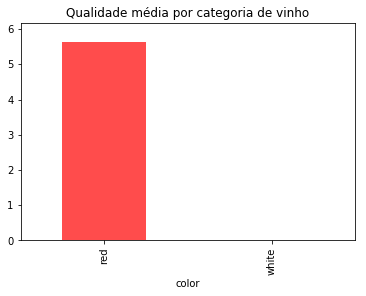

In [6]:
# Graficamente com alguns parâmetros adicionais
df_wine.groupby('color').mean()['quality'].plot(kind='bar', title='Qualidade média por categoria de vinho', color=['red', 'white'], alpha=.7);

Pontos:

* Branco sumiu em meio ao fundo
* Linha de código muito extensa
* Eixos x e y não definidos

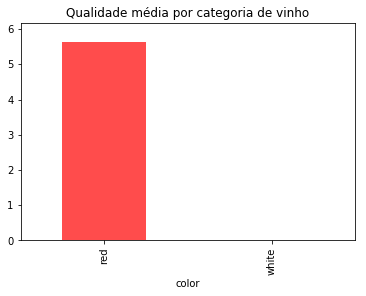

In [7]:
# Lista de cores para facilitar entendimento
colors = ['red', 'white']
df_wine.groupby('color').mean()['quality'].plot(kind='bar', title='Qualidade média por categoria de vinho', color=colors, alpha=.7);

Text(0,0.5,'Qualidade')

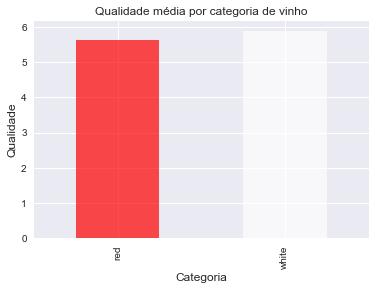

In [10]:
# Trazendo o matplotlib e seaborn para melhor resultados
sns.set() # Melhora o fundo
colors=['red', 'white']
cat_means = df_wine.groupby('color').mean()['quality']
cat_means.plot(kind='bar', title='Qualidade média por categoria de vinho', color=colors, alpha=.7);
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Qualidade', fontsize=12)

Referências: [Seaborn](https://seaborn.pydata.org/introduction.html) / [Exemplos](https://seaborn.pydata.org/examples/index.html)

Apesar de graficamente conseguir visualizar que as amostras de Vinho Branco normalmente possuem índices maiores de Qualidade, seria muito interessante verificar de onde esses dados estão vindo, ou seja, analisar a contagem de cada categoria de vinho ao longo dos índices de Qualidade.

Para tal, vamos agrupar 'quality' e 'color' em um novo DataFrame chamado 'counts':

In [12]:
counts = df_wine.groupby(['quality', 'color']).count()
counts

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality color                                                                 
3       red               10                10           10              10   
        white             20                20           20              20   
4       red               53                53           53              53   
        white            163               163          163             163   
5       red              681               681          681             681   
        white           1457              1457         1457            1457   
6       red              638               638          638             638   
        white           2198              2198         2198            2198   
7       red              199               199          199             199   
        white            880               880          880             880   
8       red               18                18           18              18   
        white            175               175          175             175   
9       white              5                 5            5               5   

               chlorides  free sulfur dioxide  total sulfur dioxide  density  \
quality color                                                                  
3       red           10                   10                    10       10   
        white         20                   20                    20       20   
4       red           53                   53                    53       53   
        white        163                  163                   163      163   
5       red          681                  681                   681      681   
        white       1457                 1457                  1457     1457   
6       red          638                  638                   638      638   
        white       2198                 2198                  2198     2198   
7       red          199                  199                   199      199   
        white        880                  880                   880      880   
8       red           18                   18                    18       18   
        white        175                  175                   175      175   
9       white          5                    5                     5        5   

                 pH  sulphates  alcohol  acidity_levels  
quality color                                            
3       red      10         10       10              10  
        white    20         20       20              20  
4       red      53         53       53              53  
        white   163        163      163             163  
5       red     681        681      681             681  
        white  1457       1457     1457            1457  
6       red     638        638      638             638  
        white  2198       2198     2198            2197  
7       red     199        199      199             199  
        white   880        880      880             880  
8       red      18         18       18              18  
        white   175        175      175             175  
9       white     5          5        5               5

In [13]:
# A contagem é a mesma em todas as categorias, o que faz muito sentido. Vamos pegar arbitrariamente uma única coluna.
counts = df_wine.groupby(['quality', 'color']).count()['pH']
counts

quality  color
3        red        10
         white      20
4        red        53
         white     163
5        red       681
         white    1457
6        red       638
         white    2198
7        red       199
         white     880
8        red        18
         white     175
9        white       5
Name: pH, dtype: int64

Text(0,0.5,'Contagem')

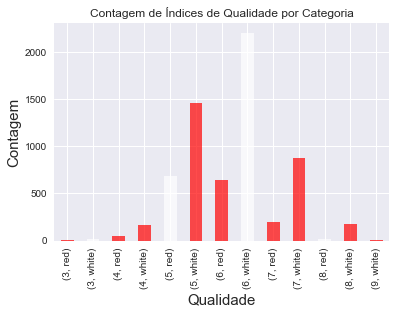

In [20]:
# Agora podemos avaliar graficamente
colors = ['red', 'white']
counts = df_wine.groupby(['quality', 'color']).count()['pH']
counts.plot(kind='bar', title='Contagem de Índices de Qualidade por Categoria', color=colors, alpha=.7)
plt.xlabel('Qualidade', fontsize=15)
plt.ylabel('Contagem', fontsize=15)

Apesar de estar aparentemente OK, o gráfico não reflete a realidade pois há mais amostras de Vinho Branco do que de Vinho Tinto, o que interefere diretamente na contagem. Para resolver este problema, é necessário trabalhar com a <b>proporção</b>, ou seja, realizar a contagem em cada categoria e dividir o valor pelo total.

Text(0,0.5,'Contagem')

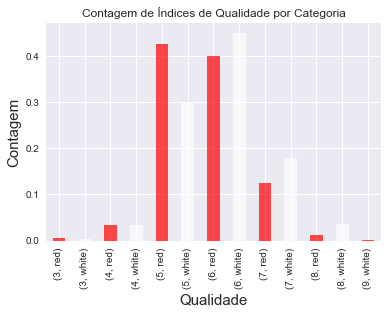

In [25]:
# Utilizando a proporção
colors = ['red', 'white'] * 6
total = df_wine.groupby('color').count()['pH'] # Total de cada uma das categorias
prop = counts / total
prop.plot(kind='bar', title='Contagem de Índices de Qualidade por Categoria', color=colors, alpha=.7)
plt.xlabel('Qualidade', fontsize=15)
plt.ylabel('Contagem', fontsize=15)

Apesar de estar bem melhor, há alguns pontos a se destacar nesse gráfico.

<b>Análise</b>

* Nas menores classificações (3, 4 e 5), amostras de Vinho Tinto possuem uma maior proporção.
* Em contrapartida, em classificações maiores (6, 7, 8 e 9), amostras de Vinho Branca marcam uma maior presença.

<b>Melhorias</b>

* Rótulos no eixo x se encontram bagunçados
* Seria interessante colocar as barras das respectivas categorias umas do lado das outras
* Não há espaço para amostras de Vinho Tinto com índice de qualidade = 9 (apesar deste número ser 0, deveria constar no gráfico)

*Como há muita customização inclusa, seria muito mais interessante plotar este gráfico diretamente no matplotlib ao invés do pandas*